In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 
import seaborn as sns 
import folium 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!unzip /content/drive/MyDrive/Keggle/sudeste.zip

Archive:  /content/drive/MyDrive/Keggle/sudeste.zip
replace sudeste.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
df = pd.read_csv('/content/sudeste.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
 #   Column  Dtype  
---  ------  -----  
 0   wsid    int64  
 1   wsnm    object 
 2   elvt    float64
 3   lat     float64
 4   lon     float64
 5   inme    object 
 6   city    object 
 7   prov    object 
 8   mdct    object 
 9   date    object 
 10  yr      int64  
 11  mo      int64  
 12  da      int64  
 13  hr      int64  
 14  prcp    float64
 15  stp     float64
 16  smax    float64
 17  smin    float64
 18  gbrd    float64
 19  temp    float64
 20  dewp    float64
 21  tmax    float64
 22  dmax    float64
 23  tmin    float64
 24  dmin    float64
 25  hmdy    float64
 26  hmax    float64
 27  hmin    float64
 28  wdsp    float64
 29  wdct    float64
 30  gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


In [9]:
df.head()

wsid         wsnm   elvt       lat        lon  inme         city prov  \
0   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333  São Gonçalo   RJ   
1   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333  São Gonçalo   RJ   
2   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333  São Gonçalo   RJ   
3   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333  São Gonçalo   RJ   
4   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333  São Gonçalo   RJ   

                  mdct        date    yr  mo  da  hr  prcp    stp   smax  \
0  2007-11-06 00:00:00  2007-11-06  2007  11   6   0   NaN  982.5  982.5   
1  2007-11-06 01:00:00  2007-11-06  2007  11   6   1   NaN  983.2  983.2   
2  2007-11-06 02:00:00  2007-11-06  2007  11   6   2   NaN  983.5  983.5   
3  2007-11-06 03:00:00  2007-11-06  2007  11   6   3   NaN  983.7  983.7   
4  2007-11-06 04:00:00  2007-11-06  2007  11   6   4   NaN  983.7  983.8   

    smin  gbrd  temp  dewp  tmax  dmax  tmin  dmin  hmdy  hmax  hmin  wdsp  \
0  981.3   NaN  29.3  12.1  29.7  16.8  25.5  10.8  35.0  58.0  32.0   3.2   
1  982.5   NaN  29.0  13.5  29.9  13.6  29.0  12.2  39.0  39.0  35.0   3.6   
2  983.2   NaN  27.4  14.0  29.0  14.0  27.4  13.6  44.0  44.0  39.0   2.5   
3  983.4   NaN  25.8  16.9  27.4  16.9  25.8  14.1  58.0  58.0  44.0   1.7   
4  983.6   NaN  25.4  16.4  26.3  17.0  25.3  16.4  57.0  58.0  56.0   3.1   

    wdct  gust  
0  101.0   6.5  
1   94.0   6.4  
2   93.0   6.9  
3   96.0   5.8  
4  110.0   7.5

In [10]:
df.describe()

wsid          elvt           lat           lon            yr  \
count  9.779168e+06  9.779168e+06  9.779168e+06  9.779168e+06  9.779168e+06   
mean   3.592531e+02  5.940923e+02 -2.023082e+01 -4.464590e+01  2.011164e+03   
std    3.901630e+01  3.980379e+02  3.172643e+00  4.882117e+00  3.207774e+00   
min    1.780000e+02  0.000000e+00 -2.496282e+01 -5.667732e+01  2.000000e+03   
25%    3.280000e+02  2.830000e+02 -2.239580e+01 -4.743410e+01  2.009000e+03   
50%    3.580000e+02  5.730000e+02 -2.075041e+01 -4.445379e+01  2.011000e+03   
75%    3.940000e+02  8.750000e+02 -1.891707e+01 -4.243575e+01  2.014000e+03   
max    4.230000e+02  1.758000e+03  0.000000e+00  0.000000e+00  2.016000e+03   

                 mo            da            hr          prcp           stp  \
count  9.779168e+06  9.779168e+06  9.779168e+06  1.407984e+06  9.779168e+06   
mean   6.521960e+00  1.575465e+01  1.150000e+01  9.366544e-01  8.804292e+02   
std    3.425538e+00  8.802154e+00  6.922190e+00  2.923291e+00  2.482650e+02   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.000000e+00  8.000000e+00  5.000000e+00  0.000000e+00  9.113000e+02   
50%    7.000000e+00  1.600000e+01  1.200000e+01  0.000000e+00  9.442000e+02   
75%    9.000000e+00  2.300000e+01  1.800000e+01  6.000000e-01  9.731000e+02   
max    1.200000e+01  3.100000e+01  2.300000e+01  1.000000e+02  1.050000e+03   

               smax          smin          gbrd          temp          dewp  \
count  9.779168e+06  9.779168e+06  5.670348e+06  9.779137e+06  9.778693e+06   
mean   8.803034e+02  8.798331e+02  1.176371e+03  2.047423e+01  1.472681e+01   
std    2.489171e+02  2.487716e+02  1.138754e+03  7.331125e+00  5.805413e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00 -3.800000e+00 -1.000000e+01   
25%    9.115000e+02  9.110000e+02  6.500000e+01  1.770000e+01  1.210000e+01   
50%    9.444000e+02  9.439000e+02  8.634270e+02  2.140000e+01  1.610000e+01   
75%    9.733000e+02  9.728000e+02  2.103000e+03  2.490000e+01  1.890000e+01   
max    1.050000e+03  1.050000e+03  1.158649e+04  4.490000e+01  4.270000e+01   

               tmax          dmax          tmin          dmin          hmdy  \
count  9.779142e+06  9.778858e+06  9.779134e+06  9.778361e+06  9.779168e+06   
mean   2.110503e+01  1.524025e+01  1.986418e+01  1.422089e+01  6.726667e+01   
std    7.545549e+00  5.866811e+00  7.134849e+00  5.777089e+00  2.654213e+01   
min   -3.200000e+00 -1.000000e+01 -8.500000e+00 -1.000000e+01  0.000000e+00   
25%    1.820000e+01  1.270000e+01  1.720000e+01  1.160000e+01  5.300000e+01   
50%    2.190000e+01  1.660000e+01  2.080000e+01  1.560000e+01  7.400000e+01   
75%    2.580000e+01  1.940000e+01  2.420000e+01  1.840000e+01  8.900000e+01   
max    4.500000e+01  4.480000e+01  4.500000e+01  4.490000e+01  1.000000e+02   

               hmax          hmin          wdsp          wdct          gust  
count  9.779156e+06  9.779124e+06  8.853607e+06  9.779168e+06  9.462694e+06  
mean   6.996991e+01  6.441965e+01  1.998156e+00  1.385991e+02  4.494015e+00  
std    2.643371e+01  2.656550e+01  1.618531e+00  1.052018e+02  2.981790e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    5.800000e+01  4.900000e+01  8.000000e-01  5.600000e+01  2.300000e+00  
50%    7.800000e+01  7.000000e+01  1.700000e+00  1.140000e+02  4.200000e+00  
75%    9.100000e+01  8.600000e+01  2.900000e+00  2.160000e+02  6.300000e+00  
max    1.000000e+02  1.000000e+02  1.980000e+01  3.600000e+02  5.000000e+01

In [11]:
df.shape

(9779168, 31)

In [12]:
df = df.set_index('mdct')
df.index = pd.to_datetime(df.index)

In [13]:
df.isna().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

In [14]:
is_178 = df['wsid'] == 178
w_station_178 = df[is_178]

<Axes: xlabel='date'>

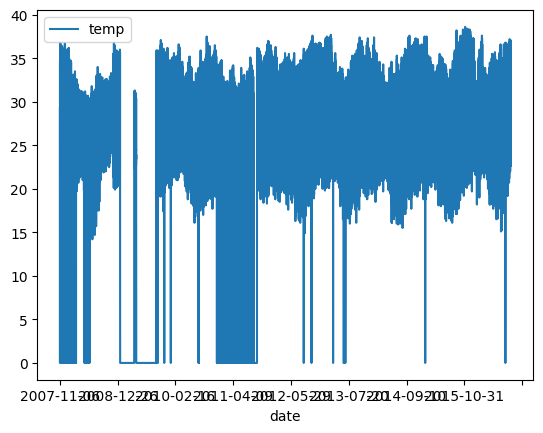

In [15]:
w_station_178.plot(x='date', y='temp')

<Axes: xlabel='mdct'>

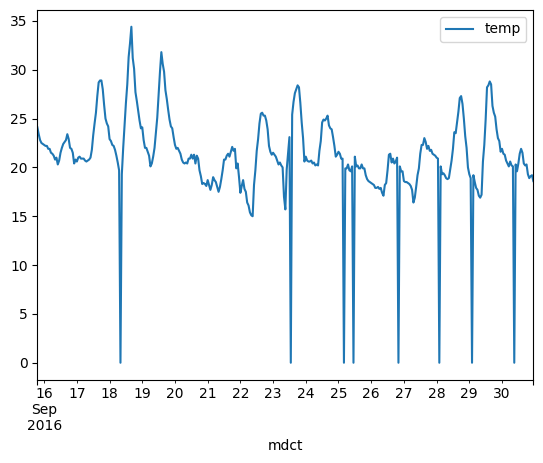

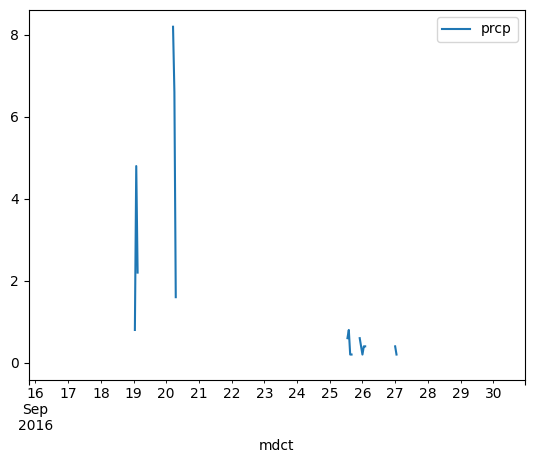

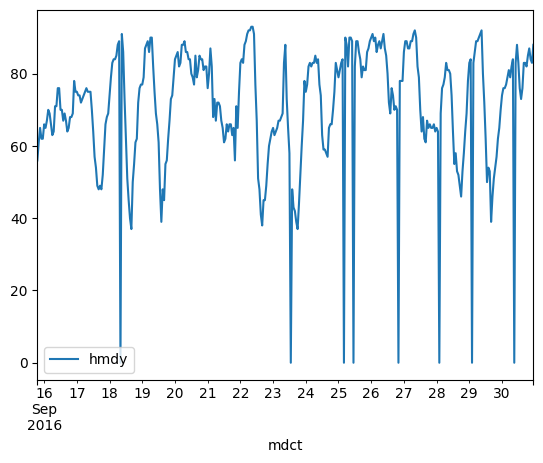

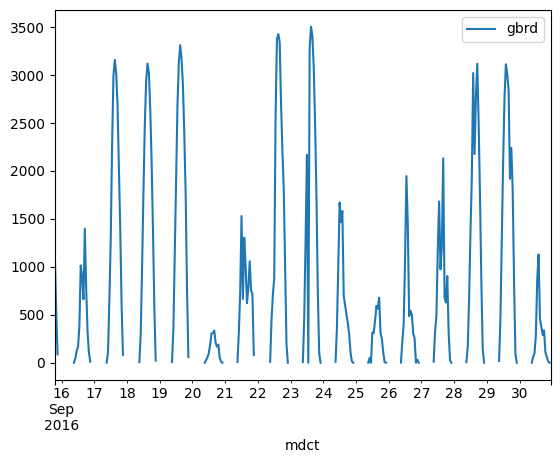

In [16]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(365)
station_384_tail_365 = station_384_tail_365.reset_index()
station_384_tail_365.plot(x='mdct', y='temp')
station_384_tail_365.plot(x='mdct', y='prcp')
station_384_tail_365.plot(x='mdct', y='hmdy')
station_384_tail_365.plot(x='mdct', y='gbrd')

<Axes: >

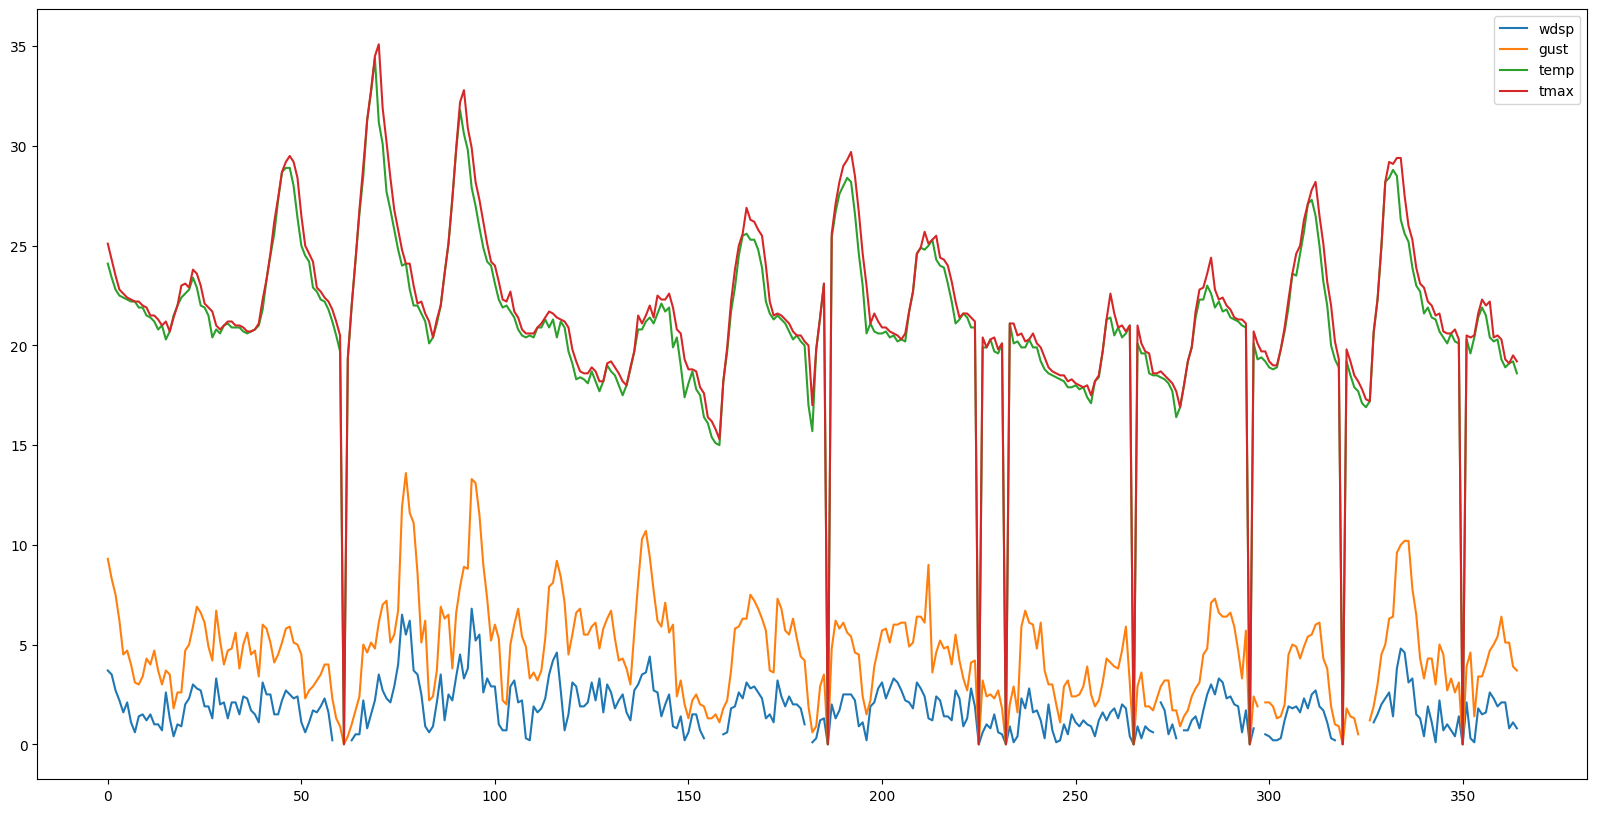

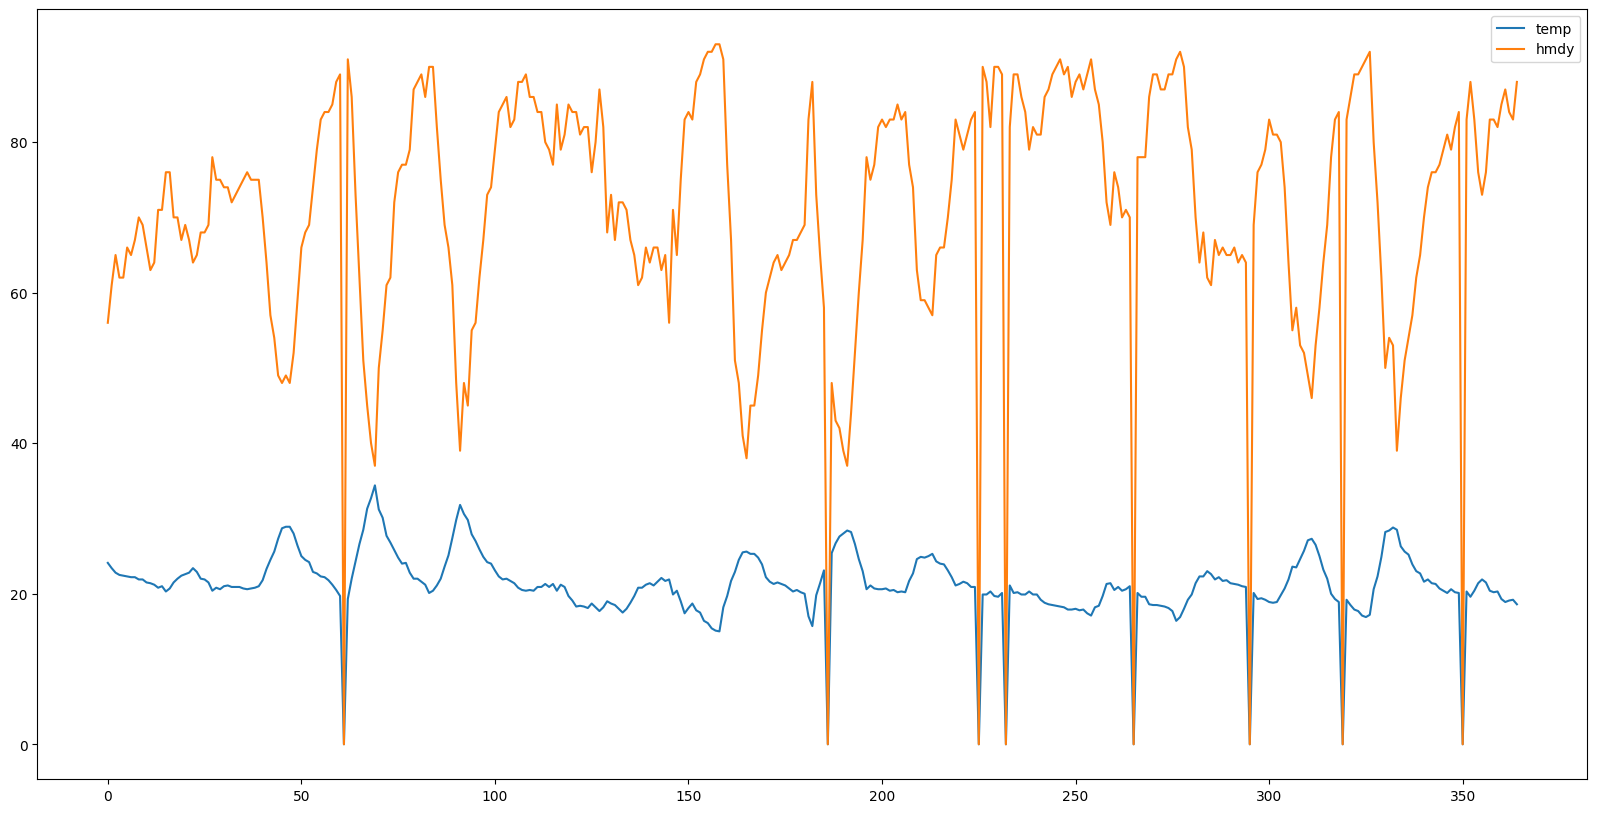

In [17]:
plt.rcParams['figure.figsize'] = (20,10)
station_384_tail_365[['wdsp','gust','temp','tmax']].plot()
station_384_tail_365[['temp','hmdy']].plot()

<Axes: >

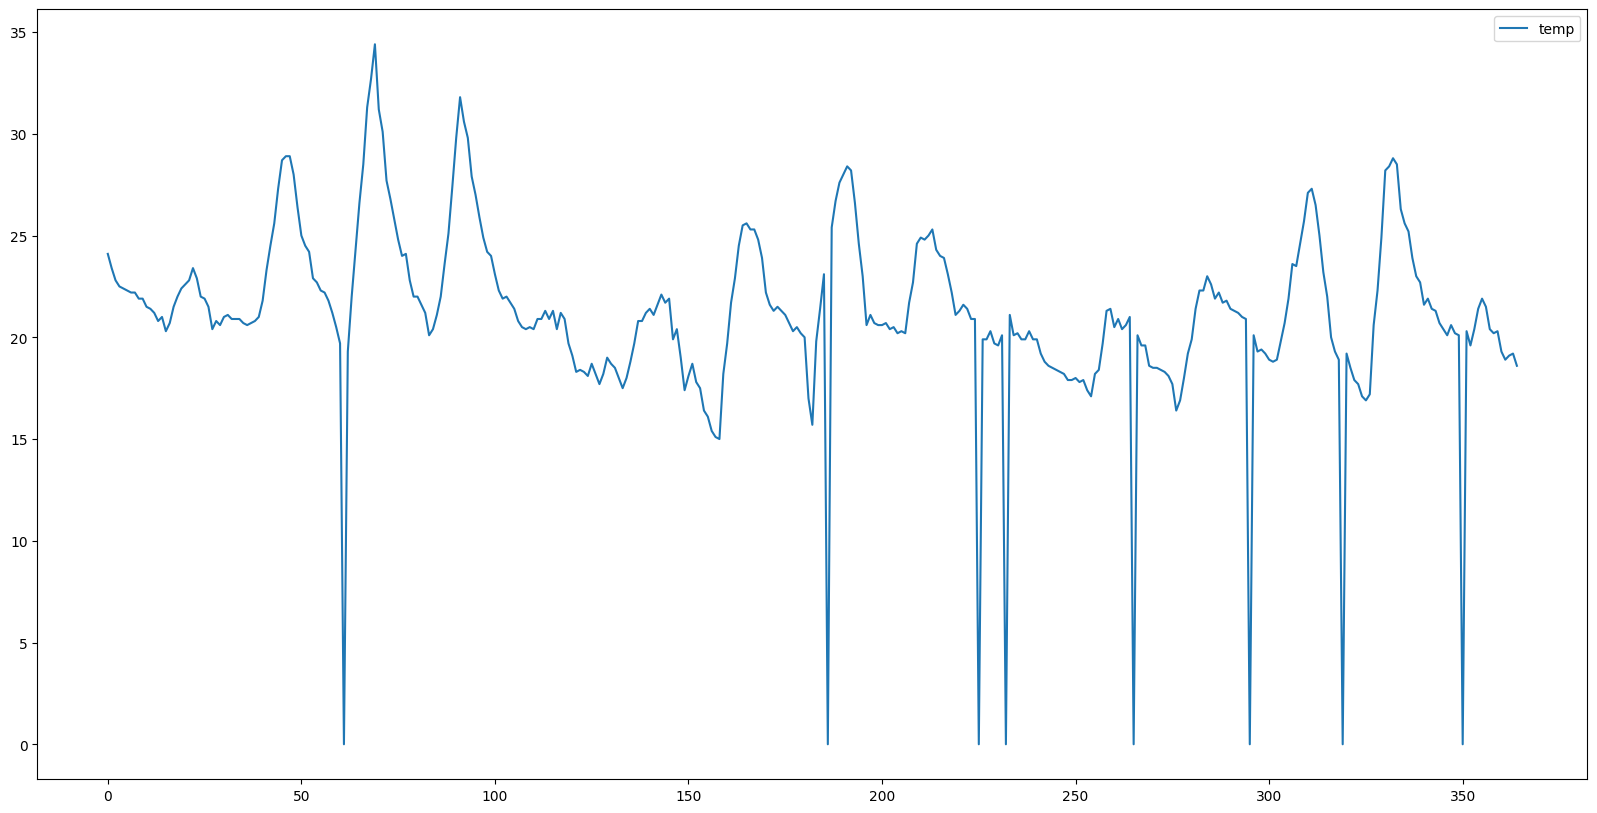

In [18]:
station_384_tail_365[['temp']].plot()

In [19]:
station_384_temp = station_384_tail_365['temp']
station_384_temp.replace(0, np.nan, inplace=True)

<Axes: >

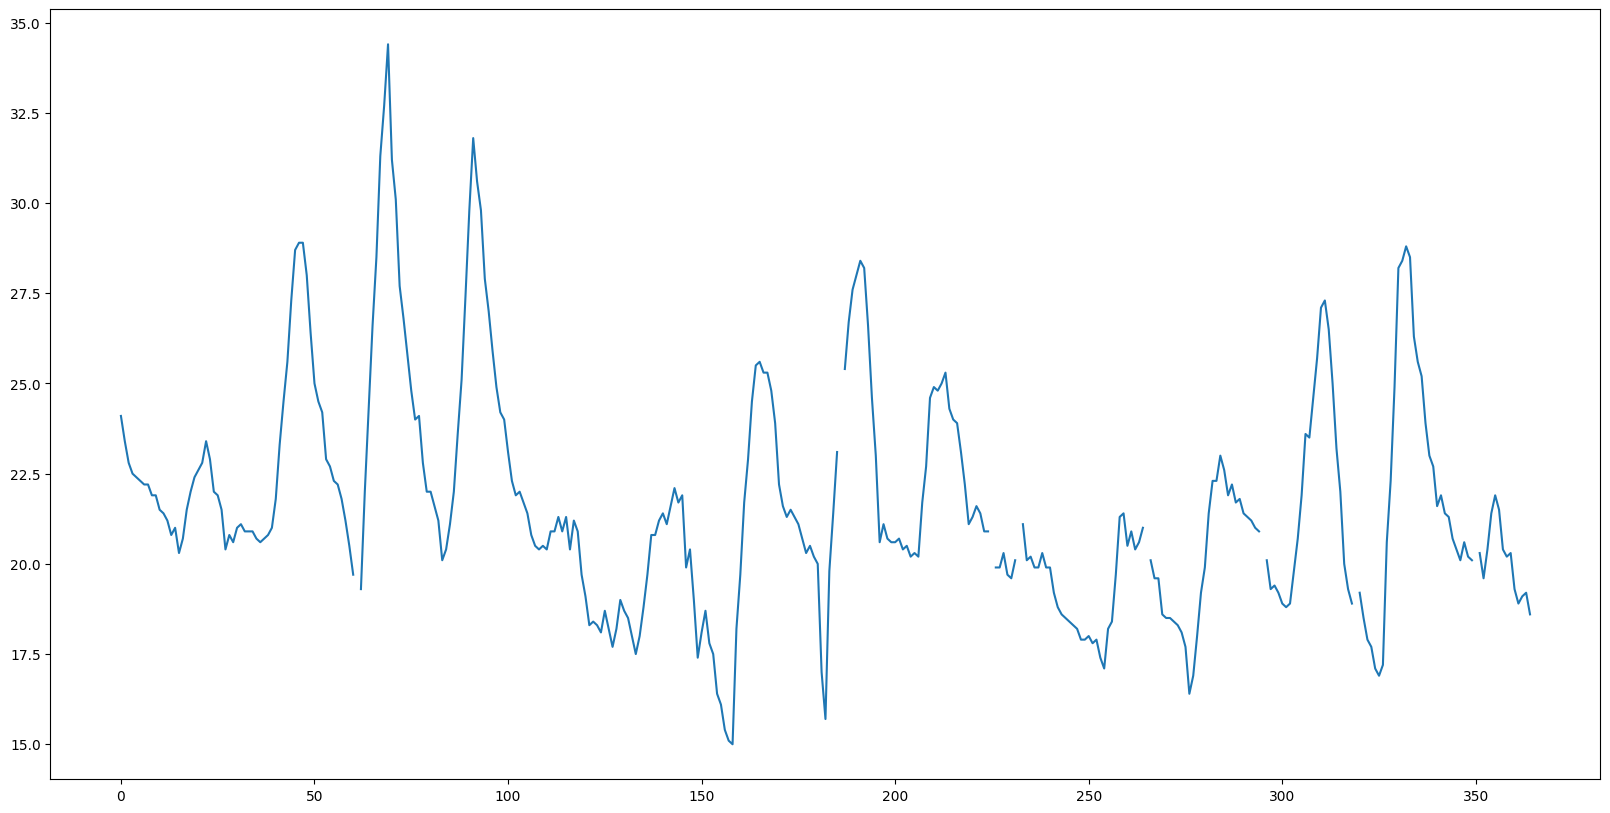

In [20]:
station_384_temp.plot()

In [21]:
station_384_temp.interpolate('linear', inplace=True, limit_direction='both')

<Axes: >

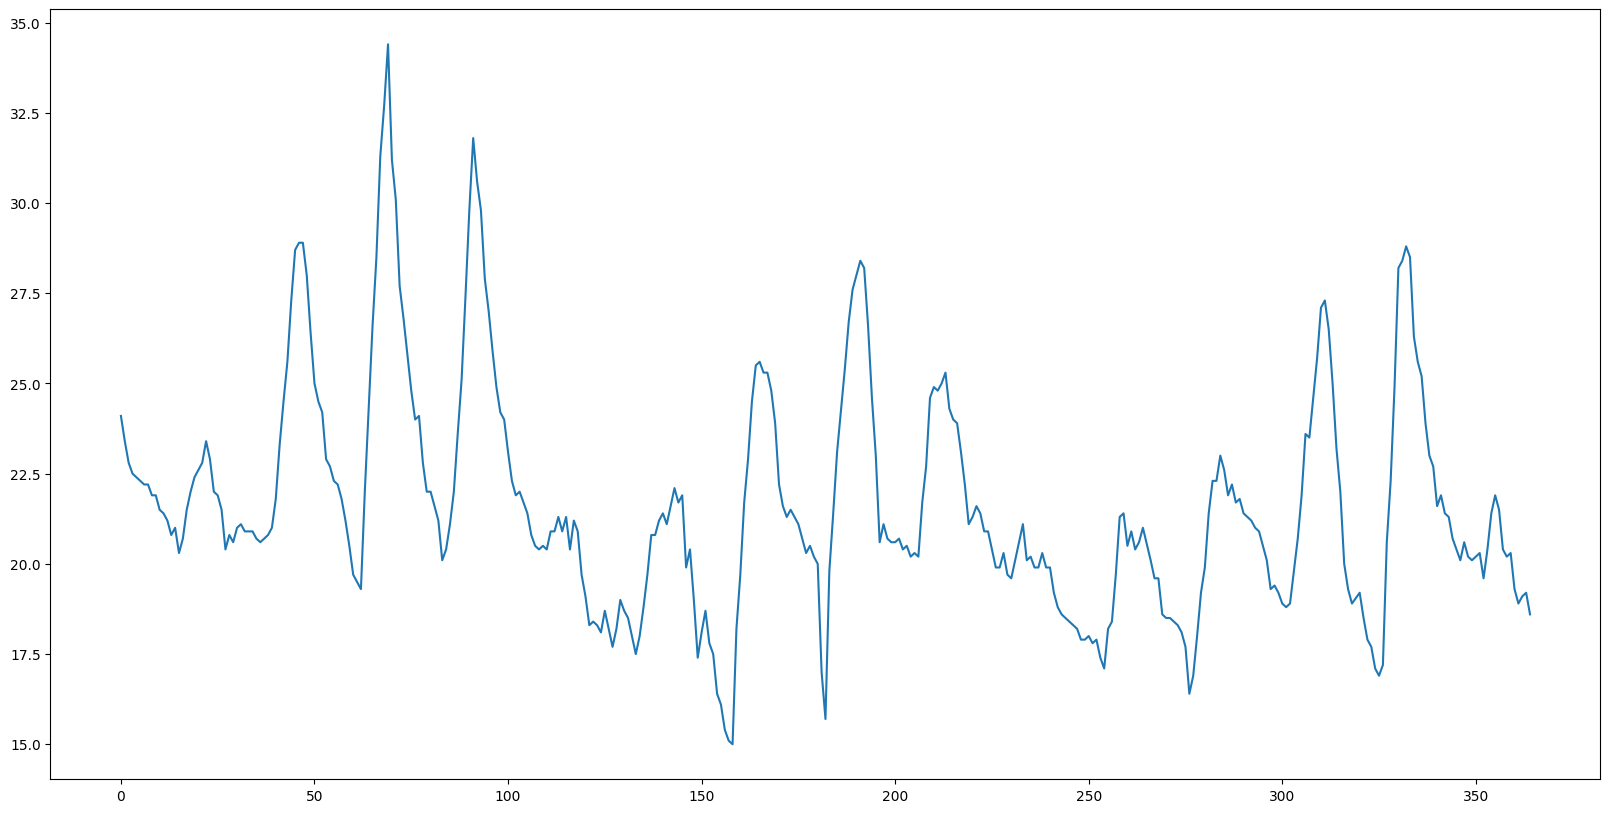

In [22]:
station_384_temp.plot()

<Axes: >

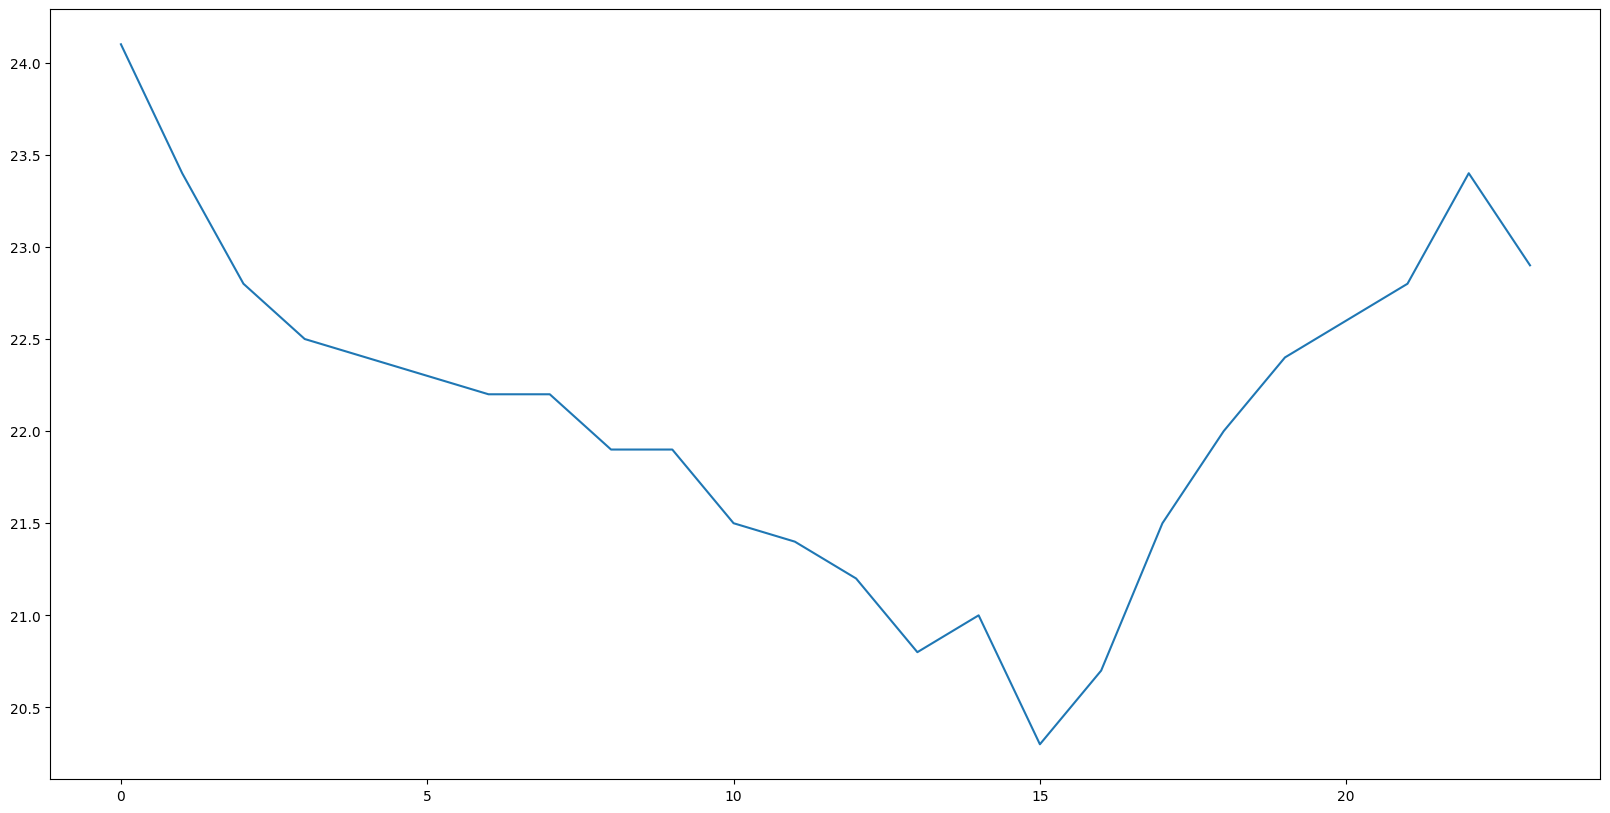

In [23]:
station_384_temp_sept_oct = station_384_temp.head(24)
station_384_temp_sept_oct.plot()

Explore one year of data

In [24]:
is_385 = df['wsid'] == 385
station_385 = df[is_385]
station_385_year = station_385.tail(8760)

<Axes: xlabel='mdct'>

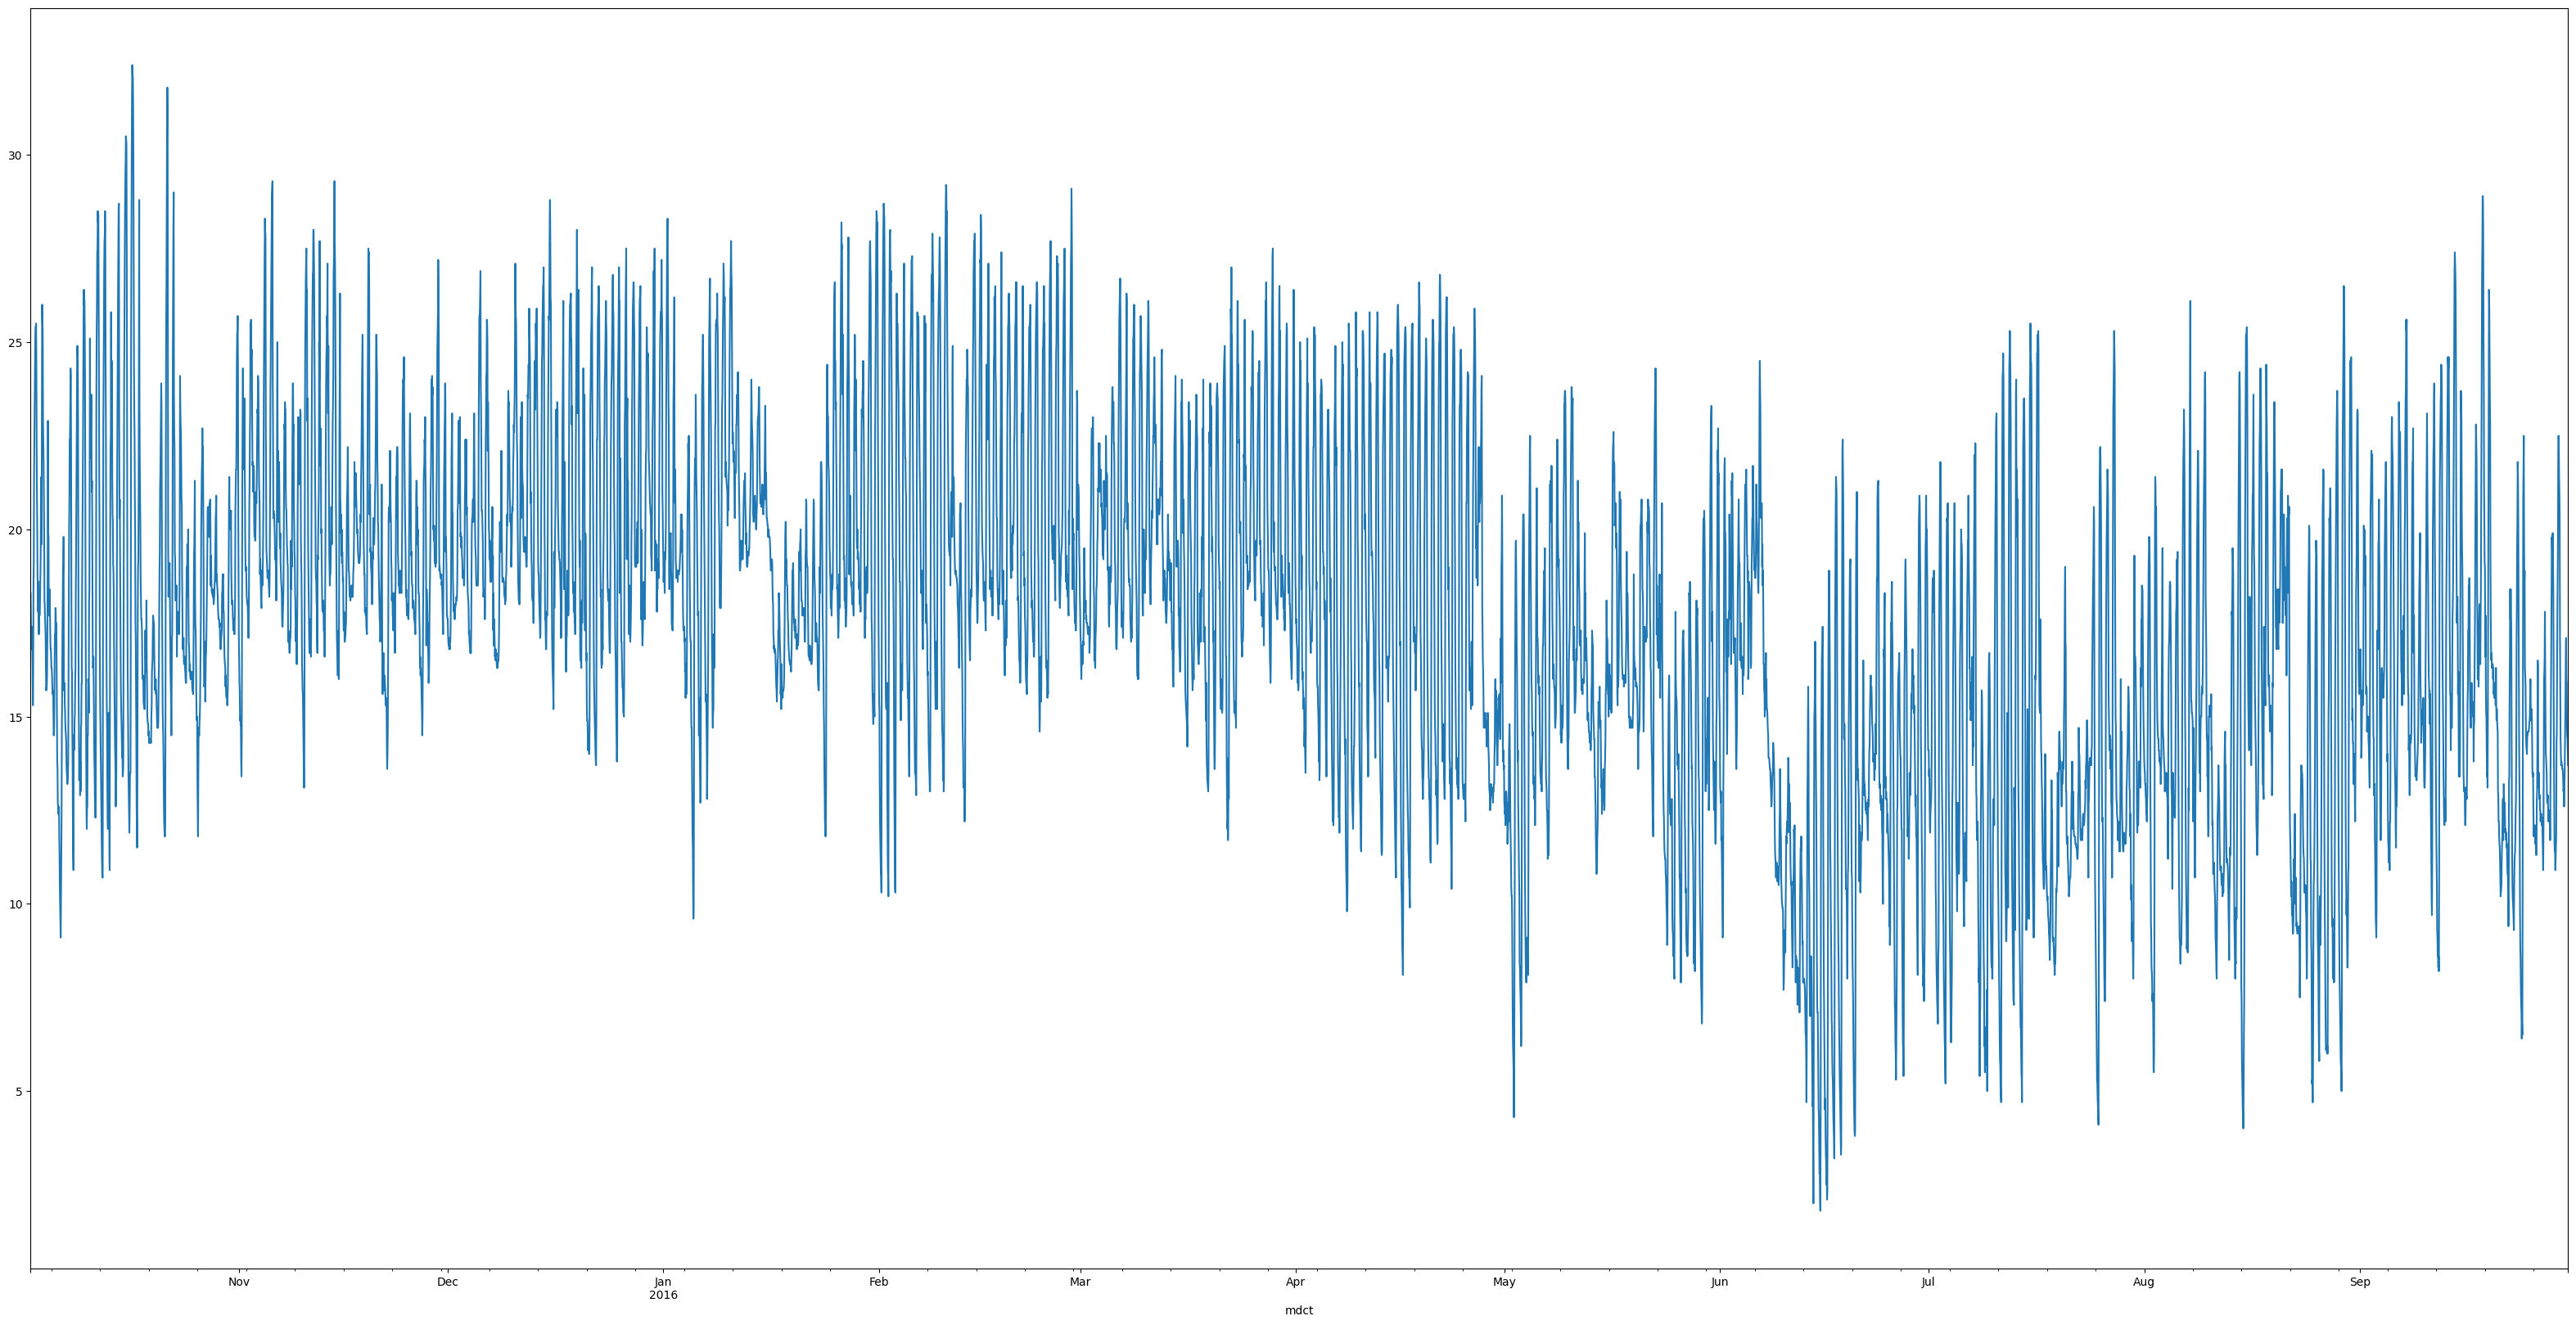

In [25]:
pd.options.mode.chained_assignment= None
station_385_year_temp = station_385_year['temp']
station_385_year_temp.replace(0, np.nan, inplace=True)
station_385_year_temp.interpolate('linear', inplace=True, limit_direction='both')
plt.rcParams['figure.figsize'] = (40,20)
station_385_year_temp.plot()

<Axes: xlabel='mdct'>

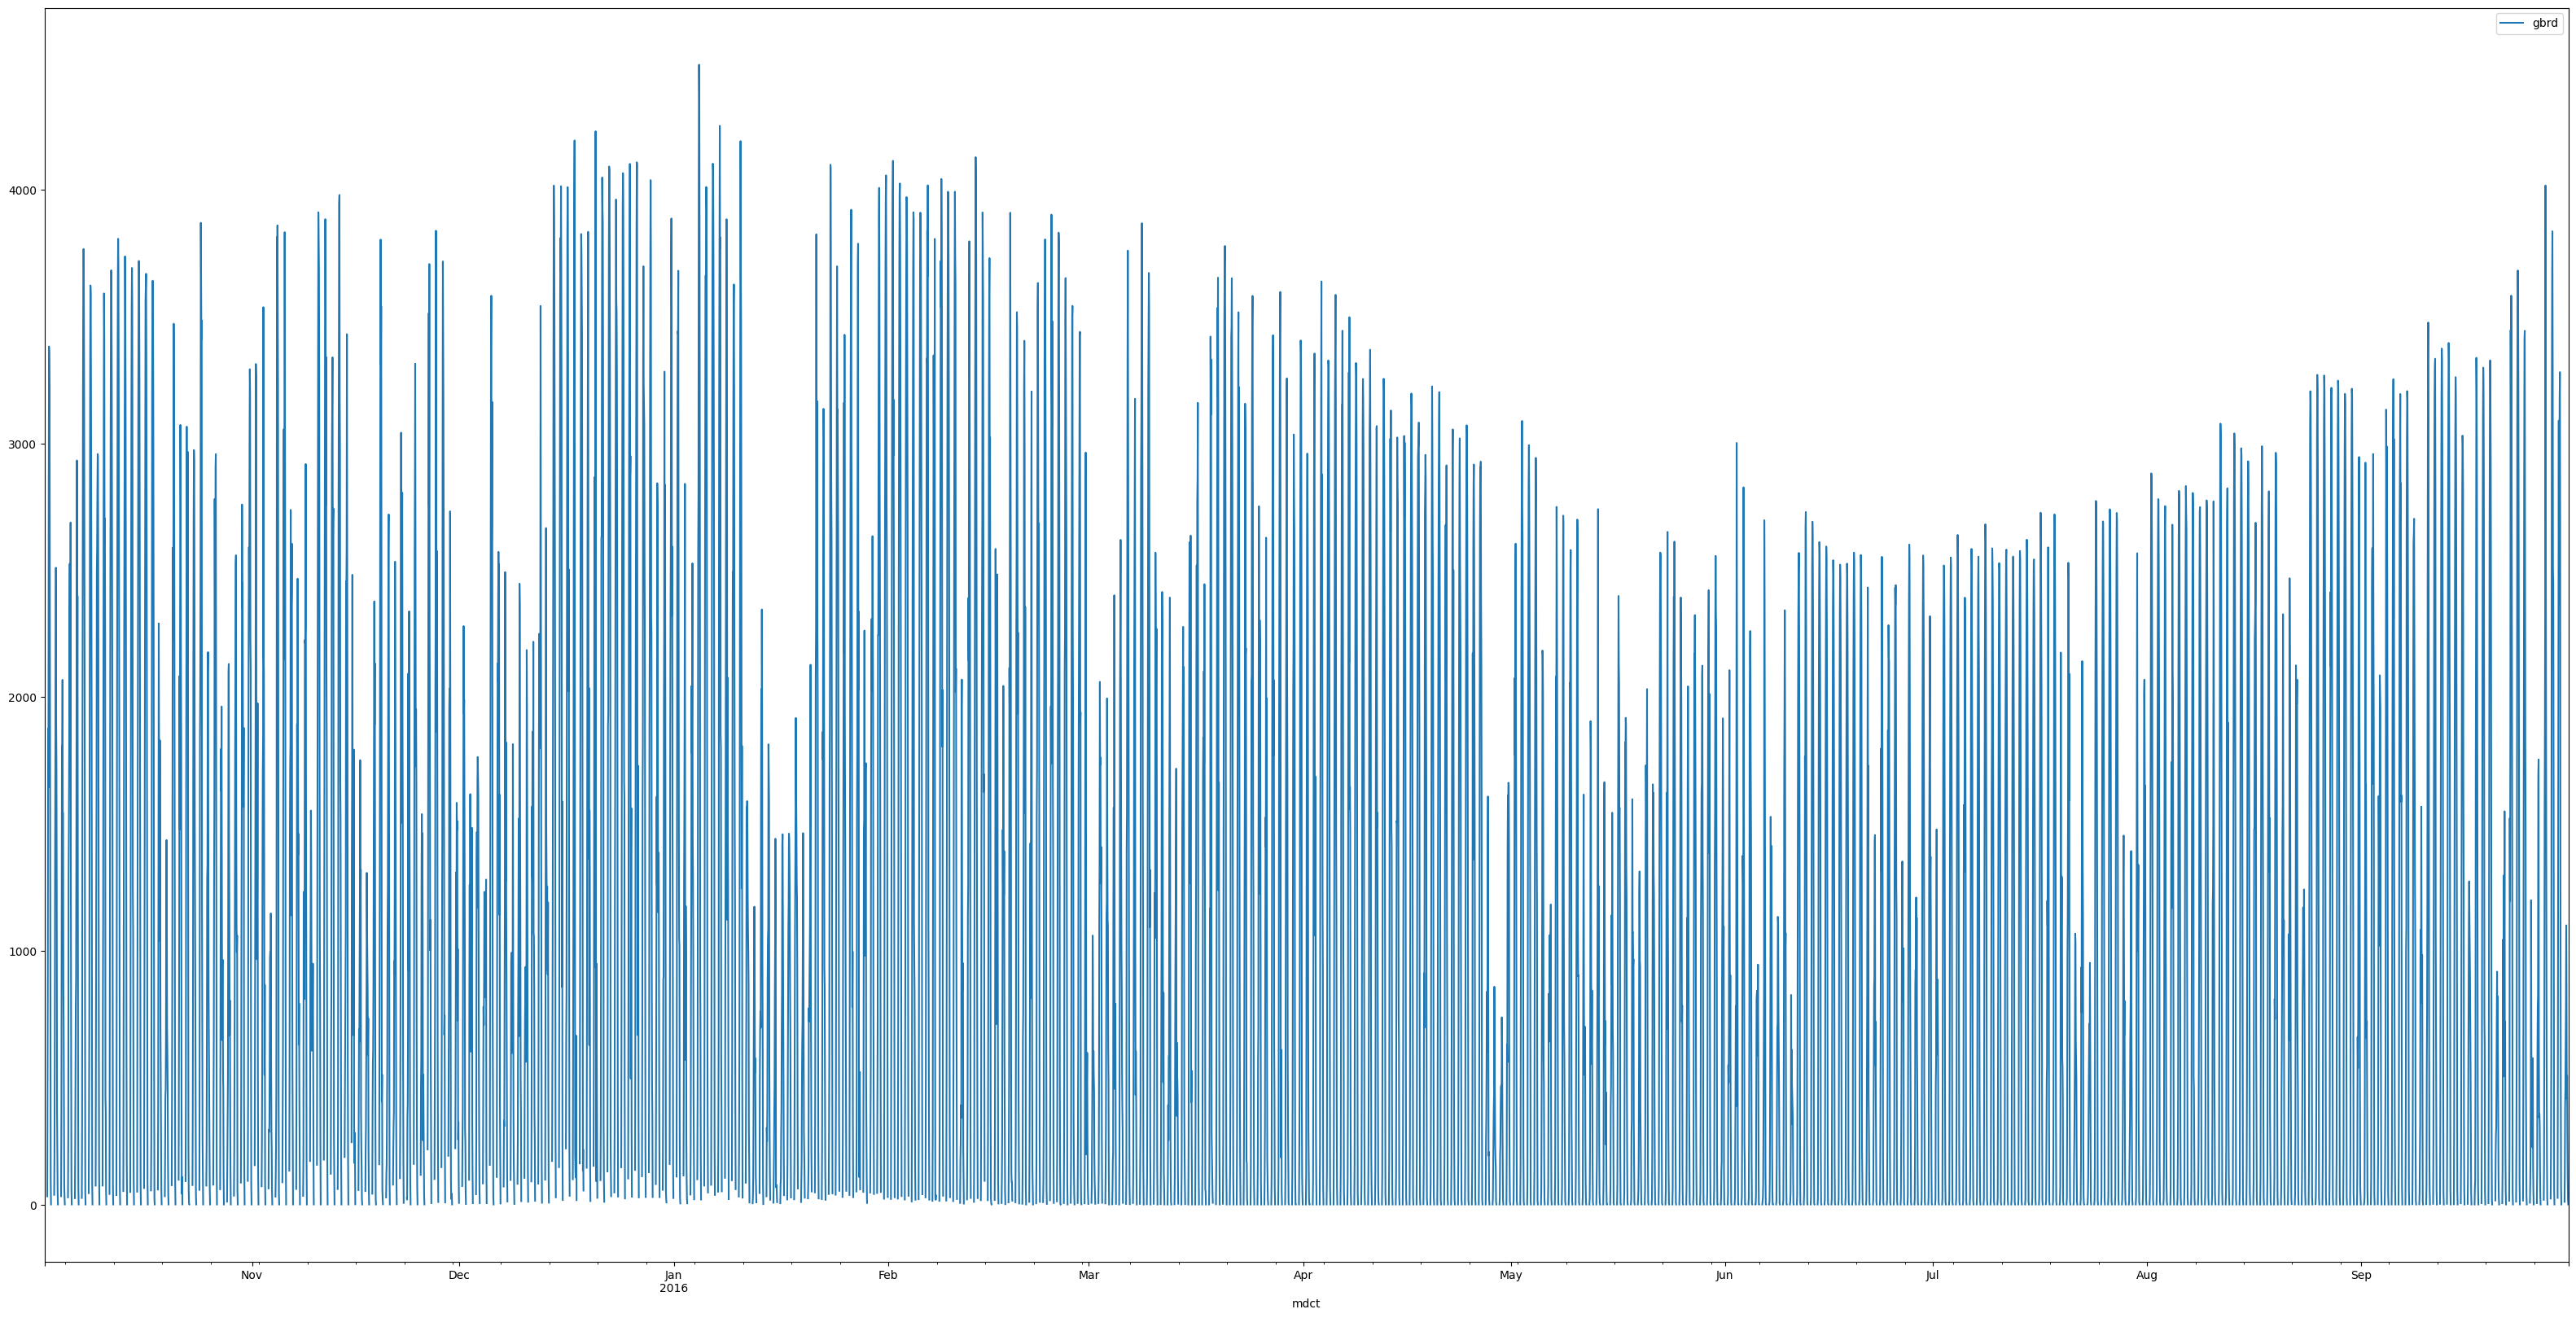

In [26]:
station_385_year[['gbrd']].plot()

<Axes: xlabel='mo'>

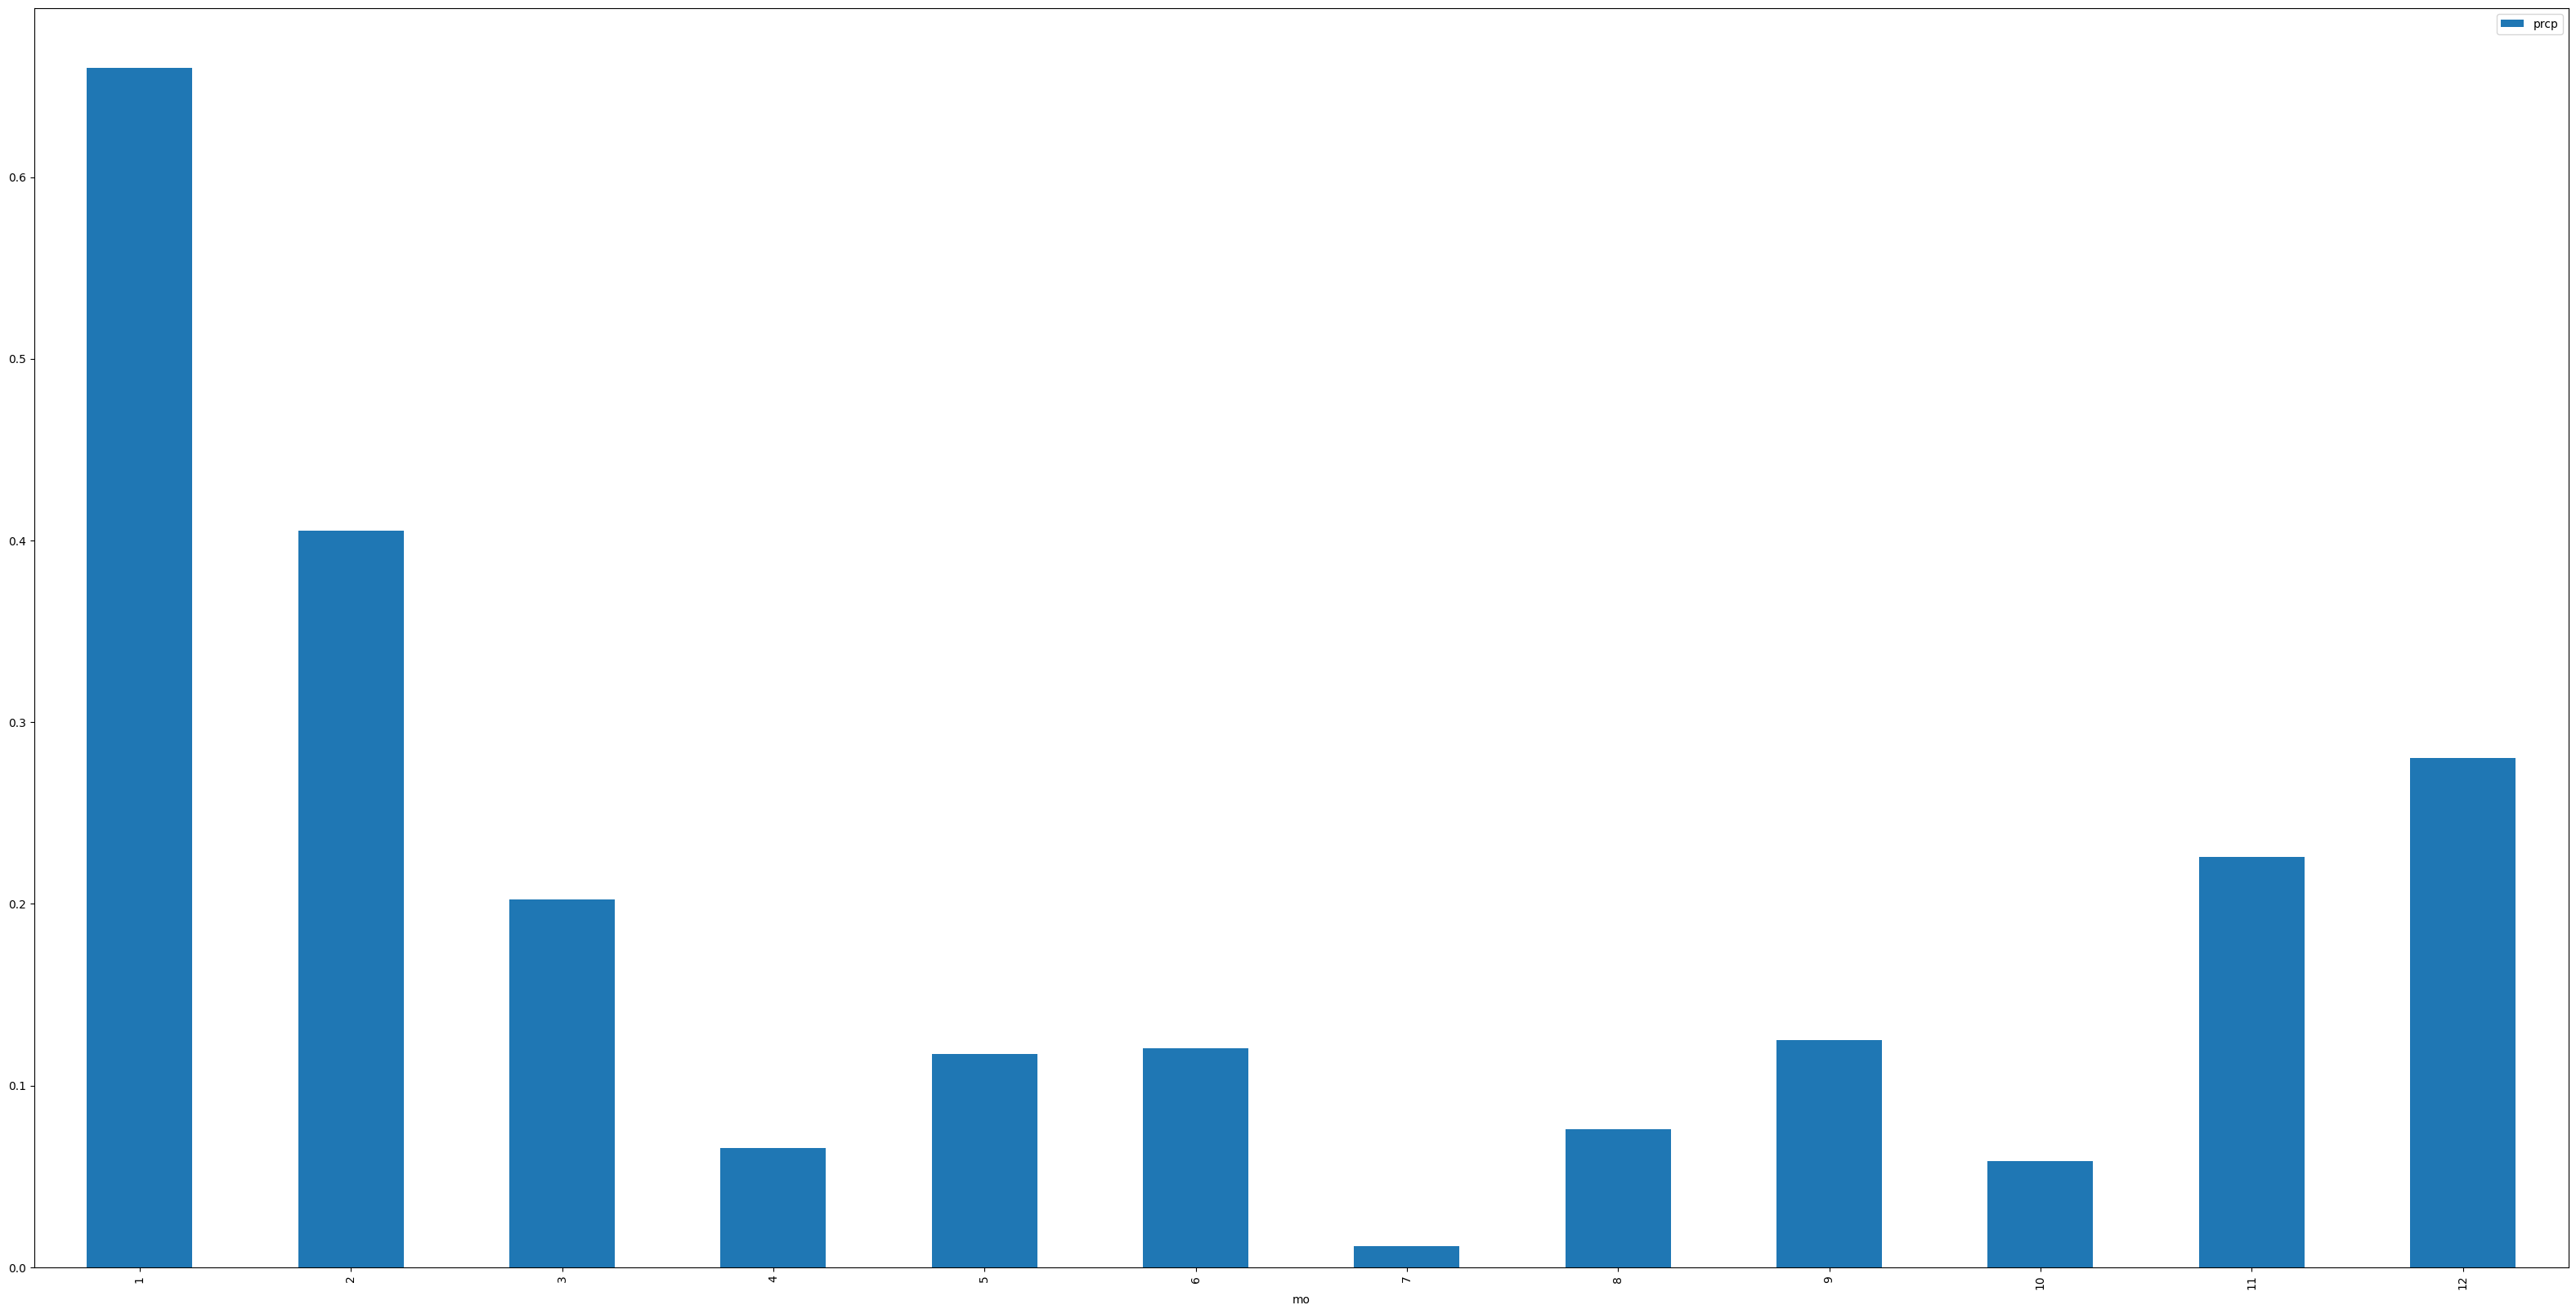

In [27]:
rain_df = station_385_year[['mo','prcp']].fillna(0)
total_rain= rain_df.groupby('mo').sum().reset_index
average_rain = rain_df.groupby('mo').mean().reset_index()
average_rain.plot(x='mo', y='prcp', kind='bar')

**Clean up on one station**

In [28]:
is_385 = df['wsid'] == 385
station_385 = df[is_385]

In [29]:
station_385.shape

(52944, 30)

In [30]:
station_385['temp'].replace(0, np.nan, inplace=True)
station_385['temp'].interpolate('linear', inplace=True, limit_direction='both')
station_385['prcp'].fillna(0,inplace=True)
station_385['gbrd'].fillna(0,inplace=True)
station_385['tmax'].replace(0, np.nan, inplace=True)
station_385['tmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['tmin'].replace(0, np.nan, inplace=True)
station_385['tmin'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dmax'].replace(0, np.nan, inplace=True)
station_385['dmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dewp'].replace(0, np.nan, inplace=True)
station_385['dewp'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dmin'].replace(0, np.nan, inplace=True)
station_385['dmin'].interpolate('linear', inplace=True, limit_direction='both')
station_385['hmax'].replace(0, np.nan, inplace=True)
station_385['hmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['hmin'].replace(0, np.nan, inplace=True)
station_385['hmin'].interpolate('linear', inplace=True, limit_direction='both')

In [31]:
d = {}
for col in station_385:
  d[col] = station_385[col].unique().tolist()

print(d['prcp'])  

[0.0, 0.2, 1.0, 1.2, 0.6, 0.4, 0.8, 1.4, 4.2, 1.8, 2.6, 2.8, 1.6, 20.6, 8.2, 3.4, 3.6, 3.8, 2.4, 2.2, 3.2, 10.0, 10.4, 2.0, 16.6, 6.2, 13.6, 10.2, 11.2, 3.0, 7.4, 5.8, 23.2, 29.2, 18.6, 30.4, 11.8, 4.8, 15.6, 4.0, 5.0, 21.4, 5.6, 5.4, 8.0, 5.2, 4.6, 21.2, 7.2, 9.2, 20.2, 16.4, 8.6, 7.8, 6.0, 10.8, 12.0, 24.4, 4.4, 6.6, 11.0, 9.0, 22.6, 8.8, 6.8, 11.6, 12.2, 6.4, 9.6, 30.0, 62.8, 18.2, 9.8, 13.0, 15.8, 13.2, 14.8, 12.4, 22.2, 13.4, 11.4, 17.8, 14.2, 7.0, 15.4, 9.4, 15.2, 12.6, 7.6, 17.0, 13.8, 25.4, 8.4, 15.0, 17.2, 10.6, 23.6, 12.8, 19.8, 34.2, 32.2, 20.0, 23.8, 14.0, 16.2, 21.6, 25.0, 20.8, 19.2, 41.0, 21.8, 22.4, 23.4, 14.6, 16.8, 24.2, 27.2, 18.4, 19.6, 19.4, 14.4, 29.4, 52.6, 21.0]


In [32]:
station_385.isna().sum()

wsid    0
wsnm    0
elvt    0
lat     0
lon     0
inme    0
city    0
prov    0
date    0
yr      0
mo      0
da      0
hr      0
prcp    0
stp     0
smax    0
smin    0
gbrd    0
temp    0
dewp    0
tmax    0
dmax    0
tmin    0
dmin    0
hmdy    0
hmax    0
hmin    0
wdsp    0
wdct    0
gust    0
dtype: int64

In [33]:
col = ['prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust']

station_385 = station_385[(station_385[col] != 0).any(axis=1)]

In [34]:
station_385.to_hdf('station_385.hdf', 'mydata', mode='w')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 
import seaborn as sns 
import folium 

Clean up entire dataset

In [3]:
df = pd.read_csv('/content/sudeste.csv')
df = df.set_index('mdct')
df.index = pd.to_datetime(df.index)
df.isna().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

In [4]:
(df == 0).astype(int).sum(axis=0)

wsid         0
wsnm         0
elvt     71760
lat      71760
lon      71760
inme         0
city         0
prov         0
date         0
yr           0
mo           0
da           0
hr      407466
prcp    746679
stp     701723
smax    705438
smin    705358
gbrd    879490
temp    628611
dewp    705849
tmax    631473
dmax    706613
tmin    631410
dmin    714946
hmdy    679673
hmax    677458
hmin    684793
wdsp    828184
wdct    870382
gust    841180
dtype: int64

In [5]:
df.head(10)

wsid         wsnm   elvt       lat        lon  inme  \
mdct                                                                       
2007-11-06 00:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 01:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 02:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 03:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 04:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 05:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 06:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 07:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 08:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 09:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   

                            city prov        date    yr  mo  da  hr  prcp  \
mdct                                                                        
2007-11-06 00:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   0   NaN   
2007-11-06 01:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   1   NaN   
2007-11-06 02:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   2   NaN   
2007-11-06 03:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   3   NaN   
2007-11-06 04:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   4   NaN   
2007-11-06 05:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   5   NaN   
2007-11-06 06:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   6   NaN   
2007-11-06 07:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   7   NaN   
2007-11-06 08:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   8   NaN   
2007-11-06 09:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   9   NaN   

                       stp   smax   smin     gbrd  temp  dewp  tmax  dmax  \
mdct                                                                        
2007-11-06 00:00:00  982.5  982.5  981.3      NaN  29.3  12.1  29.7  16.8   
2007-11-06 01:00:00  983.2  983.2  982.5      NaN  29.0  13.5  29.9  13.6   
2007-11-06 02:00:00  983.5  983.5  983.2      NaN  27.4  14.0  29.0  14.0   
2007-11-06 03:00:00  983.7  983.7  983.4      NaN  25.8  16.9  27.4  16.9   
2007-11-06 04:00:00  983.7  983.8  983.6      NaN  25.4  16.4  26.3  17.0   
2007-11-06 05:00:00  983.7  983.8  983.6      NaN  23.8  16.2  25.4  16.4   
2007-11-06 06:00:00  983.7  983.7  983.6      NaN  22.0  16.7  23.8  16.7   
2007-11-06 07:00:00  984.6  984.6  983.7      NaN  19.7  17.4  22.0  17.8   
2007-11-06 08:00:00  985.7  985.7  984.6      NaN  18.3  17.3  19.7  17.3   
2007-11-06 09:00:00  986.7  986.7  985.7  214.149  22.9  18.3  22.9  18.3   

                     tmin  dmin  hmdy  hmax  hmin  wdsp   wdct  gust  
mdct                                                                  
2007-11-06 00:00:00  25.5  10.8  35.0  58.0  32.0   3.2  101.0   6.5  
2007-11-06 01:00:00  29.0  12.2  39.0  39.0  35.0   3.6   94.0   6.4  
2007-11-06 02:00:00  27.4  13.6  44.0  44.0  39.0   2.5   93.0   6.9  
2007-11-06 03:00:00  25.8  14.1  58.0  58.0  44.0   1.7   96.0   5.8  
2007-11-06 04:00:00  25.3  16.4  57.0  58.0  56.0   3.1  110.0   7.5  
2007-11-06 05:00:00  23.8  16.0  62.0  62.0  57.0   2.0   99.0   6.8  
2007-11-06 06:00:00  22.0  16.2  72.0  72.0  62.0   1.3   93.0   4.9  
2007-11-06 07:00:00  19.5  16.6  86.0  89.0  72.0   0.5  157.0   2.8  
2007-11-06 08:00:00  18.3  16.9  93.0  94.0  85.0   NaN  141.0   1.5  
2007-11-06 09:00:00  18.2  17.1  75.0  94.0  75.0   NaN  248.0   NaN

In [6]:
df['prcp'].fillna(0, inplace=True)
df['gbrd'].fillna(0, inplace=True)

In [7]:
df.shape

(9779168, 30)

In [8]:
col = ['prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust']

df = df[(df[col] != 0).any(axis=1)]

In [9]:
df.shape

(9159199, 30)

In [10]:
df['temp'].replace(0, np.nan, inplace=True)
df['temp'].interpolate('linear', inplace=True, limit_direction='both')

df['dewp'].replace(0, np.nan, inplace=True)
df['dewp'].interpolate('linear', inplace=True, limit_direction='both')

df['tmax'].replace(0, np.nan, inplace=True)
df['tmax'].interpolate('linear', inplace=True, limit_direction='both')

df['tmin'].replace(0, np.nan, inplace=True)
df['tmin'].interpolate('linear', inplace=True, limit_direction='both')

df['dmax'].replace(0, np.nan, inplace=True)
df['dmax'].interpolate('linear', inplace=True, limit_direction='both')

df['dmin'].replace(0, np.nan, inplace=True)
df['dmin'].interpolate('linear', inplace=True, limit_direction='both')

df['hmax'].replace(0, np.nan, inplace=True)
df['hmax'].interpolate('linear', inplace=True, limit_direction='both')

df['hmin'].replace(0, np.nan, inplace=True)
df['hmin'].interpolate('linear', inplace=True, limit_direction='both')

df['hmdy'].replace(0, np.nan, inplace=True)
df['hmdy'].interpolate('linear', inplace=True, limit_direction='both')

df['wdsp'].interpolate('linear', inplace=True,limit_direction='both')
df['gust'].interpolate('linear', inplace=True,limit_direction='both')

<Axes: xlabel='mdct'>

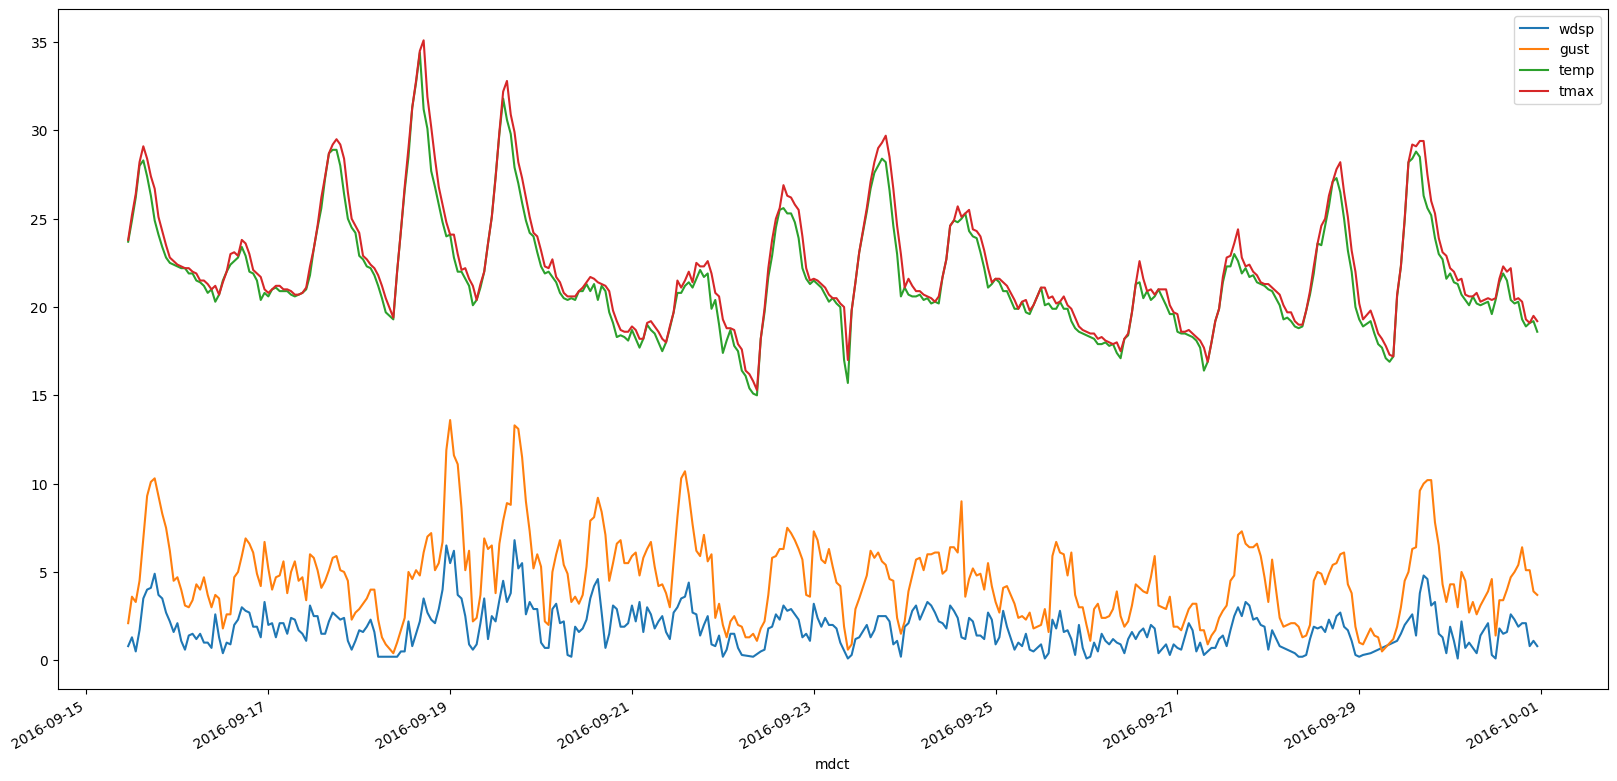

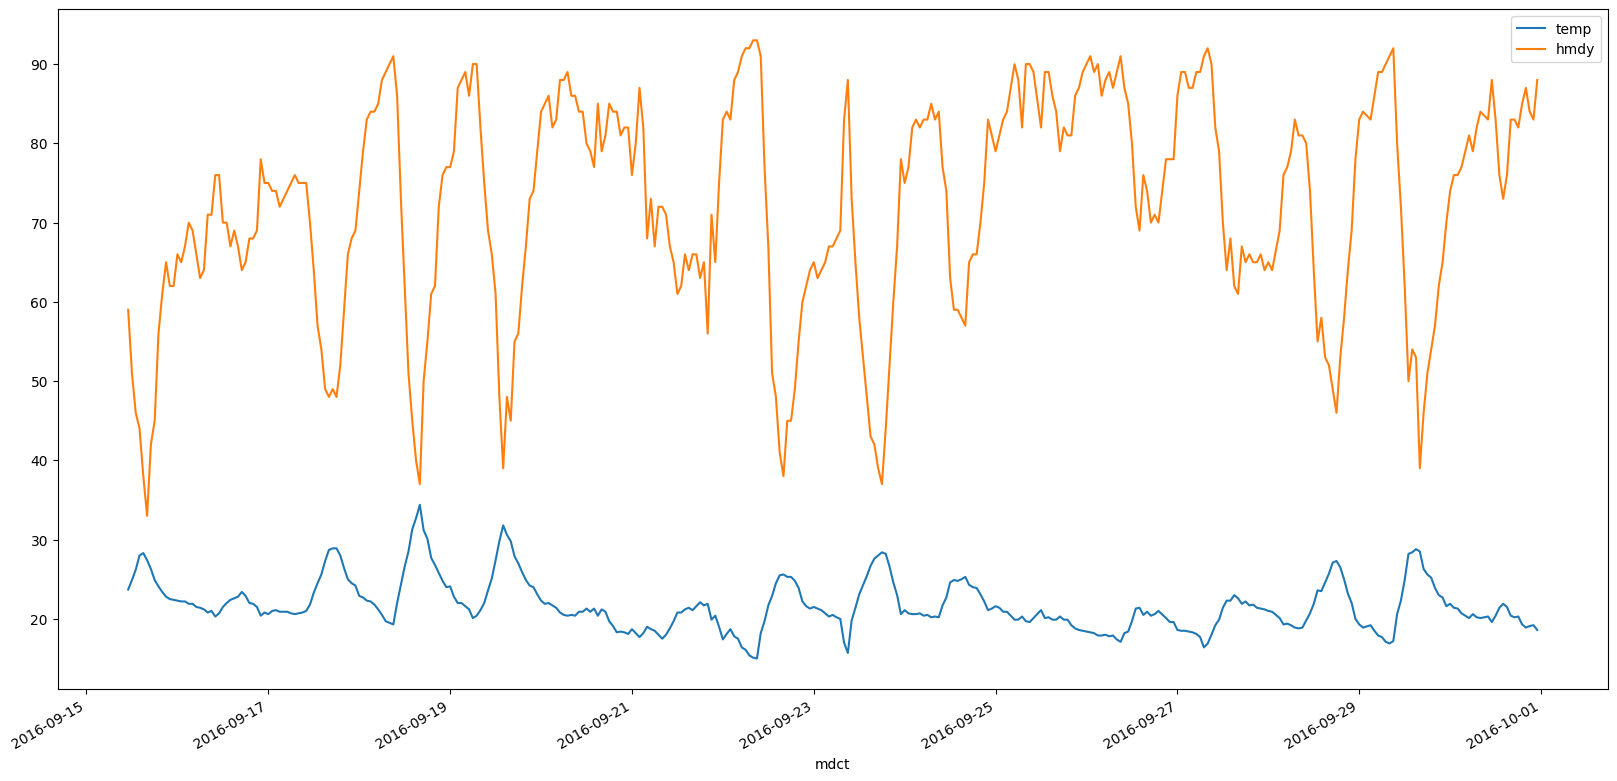

In [11]:
plt.rcParams['figure.figsize'] = (20,10)
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_year = station_384.tail(365)

station_384_year[['wdsp','gust','temp','tmax']].plot()
station_384_year[['temp','hmdy']].plot()

In [12]:
df.isna().sum()

wsid    0
wsnm    0
elvt    0
lat     0
lon     0
inme    0
city    0
prov    0
date    0
yr      0
mo      0
da      0
hr      0
prcp    0
stp     0
smax    0
smin    0
gbrd    0
temp    0
dewp    0
tmax    0
dmax    0
tmin    0
dmin    0
hmdy    0
hmax    0
hmin    0
wdsp    0
wdct    0
gust    0
dtype: int64

In [13]:
(df == 0).astype(int).sum(axis=0)

wsid          0
wsnm          0
elvt      39710
lat       39710
lon       39710
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr       380996
prcp    8497894
stp       81754
smax      85469
smin      85389
gbrd    4368341
temp          2
dewp         23
tmax          3
dmax         15
tmin          4
dmin         24
hmdy          0
hmax          0
hmin          0
wdsp     210341
wdct     250413
gust     222488
dtype: int64

In [14]:
df[df.elvt == 0].index[0]

Timestamp('2008-07-25 18:00:00')

In [15]:
df[df.elvt == 0].head()

wsid   wsnm  elvt  lat  lon  inme     city prov  \
mdct                                                                   
2008-07-25 18:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   
2008-07-25 19:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   
2008-07-25 20:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   
2008-07-25 21:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   
2008-07-25 22:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   

                           date    yr  mo  da  hr  prcp     stp    smax  \
mdct                                                                      
2008-07-25 18:00:00  2008-07-25  2008   7  25  18   0.0  1014.3  1014.3   
2008-07-25 19:00:00  2008-07-25  2008   7  25  19   0.0  1014.8  1014.8   
2008-07-25 20:00:00  2008-07-25  2008   7  25  20   0.0  1015.2  1015.2   
2008-07-25 21:00:00  2008-07-25  2008   7  25  21   0.0  1015.8  1015.8   
2008-07-25 22:00:00  2008-07-25  2008   7  25  22   0.0  1016.7  1016.7   

                       smin     gbrd  temp  dewp  tmax  dmax  tmin  dmin  \
mdct                                                                       
2008-07-25 18:00:00  1014.0  426.700  20.0  16.0  20.2  16.9  19.8  15.8   
2008-07-25 19:00:00  1014.2  167.094  19.9  15.3  20.0  16.3  19.8  15.3   
2008-07-25 20:00:00  1014.8   95.589  19.6  15.4  19.9  15.7  19.5  15.2   
2008-07-25 21:00:00  1015.2   12.199  19.3  15.4  19.6  15.9  19.2  15.2   
2008-07-25 22:00:00  1015.8    0.000  19.2  14.0  19.3  15.5  19.2  13.7   

                     hmdy  hmax  hmin  wdsp   wdct  gust  
mdct                                                      
2008-07-25 18:00:00  78.0  83.0  76.0   3.3  242.0   7.2  
2008-07-25 19:00:00  75.0  80.0  75.0   2.5  239.0   7.4  
2008-07-25 20:00:00  77.0  78.0  74.0   2.8  222.0   6.8  
2008-07-25 21:00:00  78.0  80.0  77.0   1.9  276.0   8.0  
2008-07-25 22:00:00  72.0  79.0  70.0   4.0   94.0   8.4

In [16]:
df[['wsid','wsnm','prov','elvt','lat','lon']].drop_duplicates()

wsid                         wsnm prov    elvt  \
mdct                                                                  
2007-11-06 00:00:00   178                  SÃO GONÇALO   RJ   237.0   
2006-10-31 16:00:00   303                      VITÓRIA   ES     9.0   
2007-08-09 10:00:00   304                 SANTA TERESA   ES   976.0   
2006-10-27 00:00:00   305                     LINHARES   ES    38.0   
2006-11-03 00:00:00   306               ALFREDO CHAVES   ES    14.0   
2006-10-25 15:00:00   307                   SÃO MATEUS   ES    29.0   
2006-10-25 19:00:00   308                       ALEGRE   ES   129.0   
2008-06-25 12:00:00   309                PRES. KENNEDY   ES    69.0   
2008-06-23 12:00:00   310                 NOVA VENECIA   ES   156.0   
2011-09-28 18:00:00   311               AFONSO CLAUDIO   ES   507.0   
2003-03-21 00:00:00   312                    BARBACENA   MG  1169.0   
2002-12-19 12:00:00   313                        ARAXÁ   MG  1018.0   
2002-12-19 00:00:00   314                MONTES CLAROS   MG   646.0   
2003-03-21 00:00:00   315                   UBERLÂNDIA   MG   875.0   
2002-12-15 00:00:00   316                     ALMENARA   MG   189.0   
2004-12-19 14:00:00   317                  MONTE VERDE   MG  1545.0   
2005-09-15 21:00:00   318                       VIÇOSA   MG   698.0   
2006-02-24 22:00:00   319                      TIMÓTEO   MG   493.0   
2006-05-12 09:00:00   320                    ITUIUTABA   MG   540.0   
2006-07-28 16:00:00   321                  OURO BRANCO   MG  1048.0   
2006-06-09 20:00:00   322                  S.J.DEL REI   MG   930.0   
2006-07-13 05:00:00   323                     VARGINHA   MG   950.0   
2006-07-18 00:00:00   324                       PASSOS   MG   782.0   
2006-08-30 13:00:00   325                       MURIAÉ   MG   283.0   
2007-05-26 15:00:00   326                 JUÍZ DE FORA   MG   937.0   
2006-07-15 00:00:00   327                CAMPINA VERDE   MG   559.0   
2006-07-18 17:00:00   328            CONC. DAS ALAGOAS   MG   573.0   
2006-10-10 13:00:00   329         BELO HOR. (PAMPULHA)   MG   854.0   
2006-08-21 16:00:00   330            SERRA DOS AIMORES   MG   212.0   
2006-08-22 18:00:00   331                   PATROCÍNIO   MG   978.0   
2006-08-17 13:00:00   332                      FORMIGA   MG   878.0   
2006-08-19 00:00:00   333                   SACRAMENTO   MG   913.0   
2007-06-26 16:00:00   334                  MONTALVANIA   MG   520.0   
2006-08-25 14:00:00   335                TEÓFILO OTONI   MG   467.0   
2006-08-26 00:00:00   336                  TRÊS MARIAS   MG   931.0   
2007-06-04 20:00:00   337                 PASSA QUATRO   MG  1017.0   
2006-11-28 12:00:00   338                       CALDAS   MG  1077.0   
2006-12-02 00:00:00   339                  MARIA DA FÉ   MG  1281.0   
2007-05-29 14:00:00   340         GOVERNADOR VALADARES   MG   198.0   
2007-06-02 15:00:00   341                     GUANHÃES   MG   853.0   
2007-08-06 00:00:00   342                      AIMORES   MG   288.0   
2008-06-27 12:00:00   343                    FLORESTAL   MG   754.0   
2007-06-01 18:00:00   344              DORES DO INDAIÁ   MG   721.0   
2007-06-05 00:00:00   345                   DIAMANTINA   MG  1359.0   
2006-12-18 21:00:00   346                      CURVELO   MG   669.0   
2007-11-11 00:00:00   347                   MOCAMBINHO   MG   454.0   
2007-08-01 12:00:00   348                      MANTENA   MG   255.0   
2007-09-01 00:00:00   349                    CAPELINHA   MG   932.0   
2007-06-16 13:00:00   350                         UNAI   MG   641.0   
2007-11-14 00:00:00   351                     ESPINOSA   MG   565.0   
2007-06-19 16:00:00   352                      BURITIS   MG   894.0   
2007-07-04 00:00:00   353                     PIRAPORA   MG   505.0   
2007-07-12 00:00:00   354                   GUARDA-MOR   MG   997.0   
2007-06-30 00:00:00   355                    SÃO ROMÃO   MG   490.0   
2007-06-23 00:00:00   356               CHAPA

In [17]:
df[df.elvt == 0].wsid.unique()

array([418])

In [18]:
df['elvt'].replace(0, 4, inplace=True)
df['lat'].replace(0, -23.993611, inplace=True)
df['lon'].replace(0, -46.256389, inplace=True)

In [19]:
stp_smax_equal = df[df['stp'] == df['smax']].count().stp
stp_smax_equal

3652525

In [20]:
stp_smin_equal = df[df['stp'] == df['smin']].count().stp
stp_smin_equal

3458158

In [21]:
smax_smin_equal = df[df['smax'] == df['smin']].count().stp
smax_smin_equal

92853

In [22]:
df['stp'].replace(0, np.nan, inplace=True)
df['stp'].interpolate('linear', inplace=True, limit_direction='both')

df['smax'].replace(0, np.nan, inplace=True)
df['smax'].interpolate('linear', inplace=True, limit_direction='both')

df['smin'].replace(0, np.nan, inplace=True)
df['smin'].interpolate('linear', inplace=True, limit_direction='both')

Air pressure and wind analysis

In [ ]:
#2 week sample for station 384
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(365)
station_384_tail_365 = station_384_tail_365.reset_index()

station_384_tail_365.plot(x='mdct', y='wdsp')
station_384_tail_365.plot(x='mdct', y='gust')
station_384_tail_365.plot(x='mdct', y='stp')
station_384_tail_365.plot(x='mdct', y='smax')
station_384_tail_365.plot(x='mdct', y='smin')

<Axes: xlabel='mdct'>

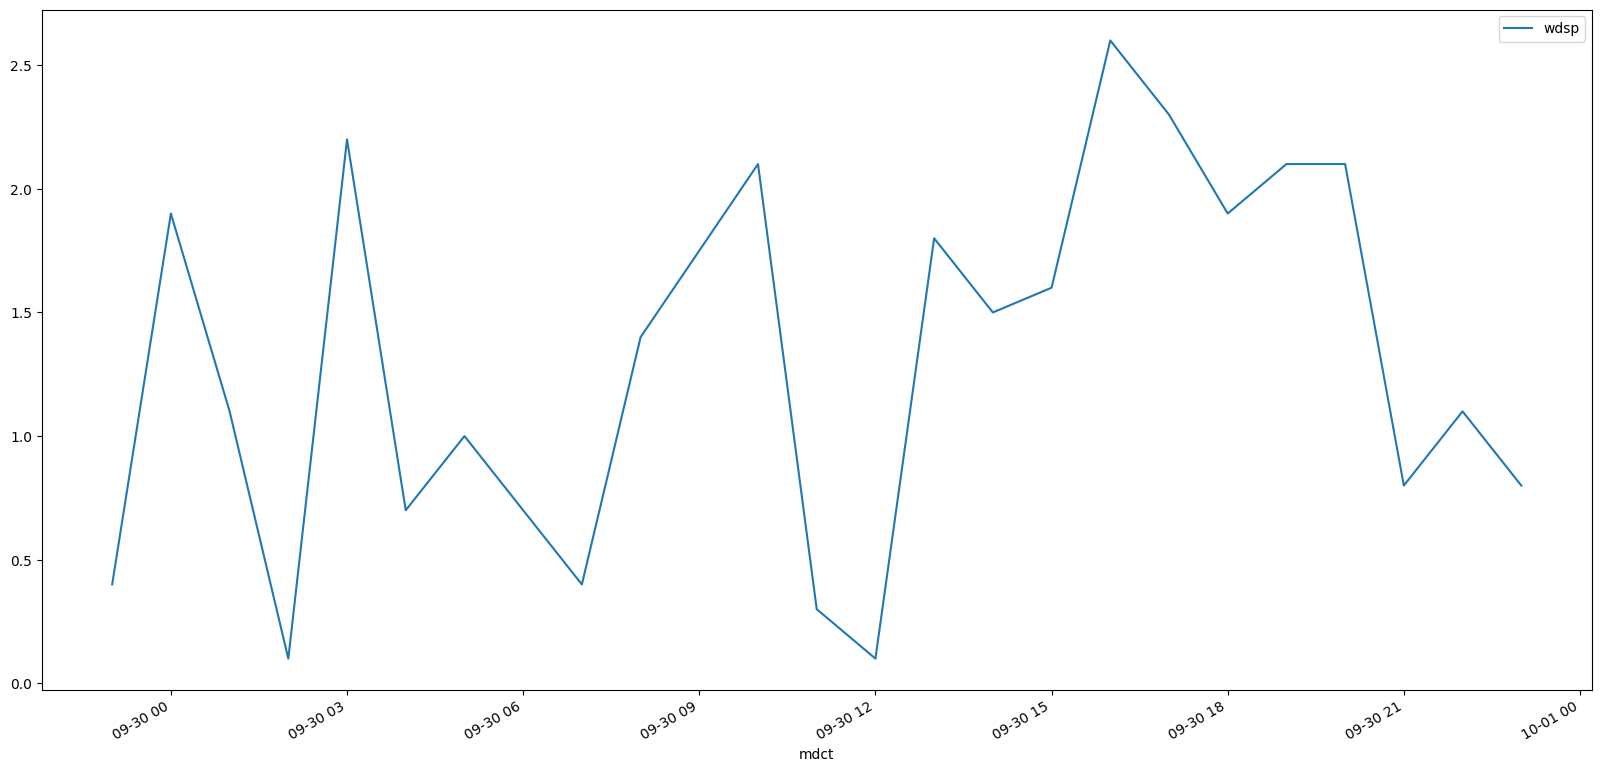

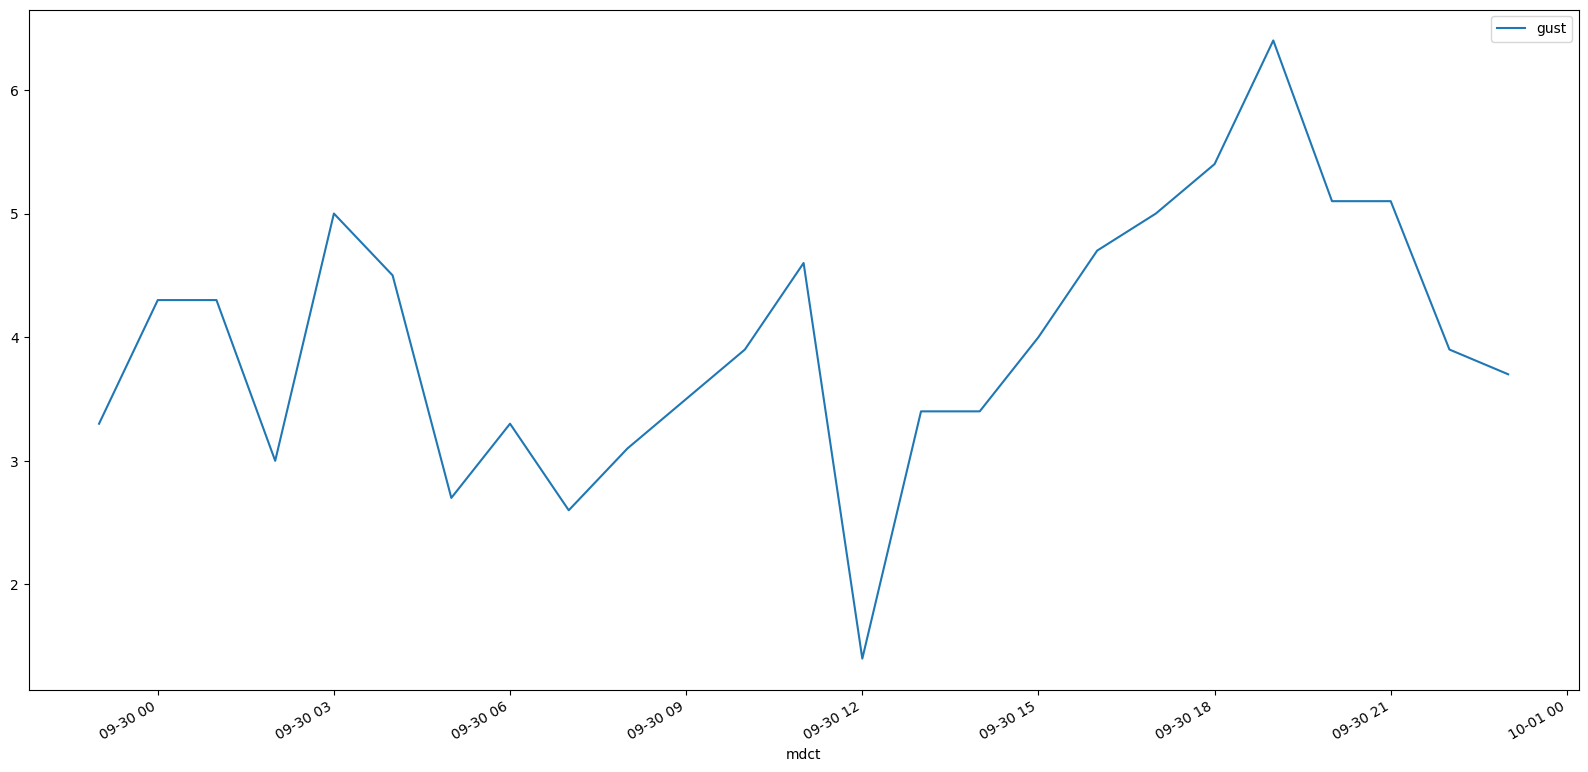

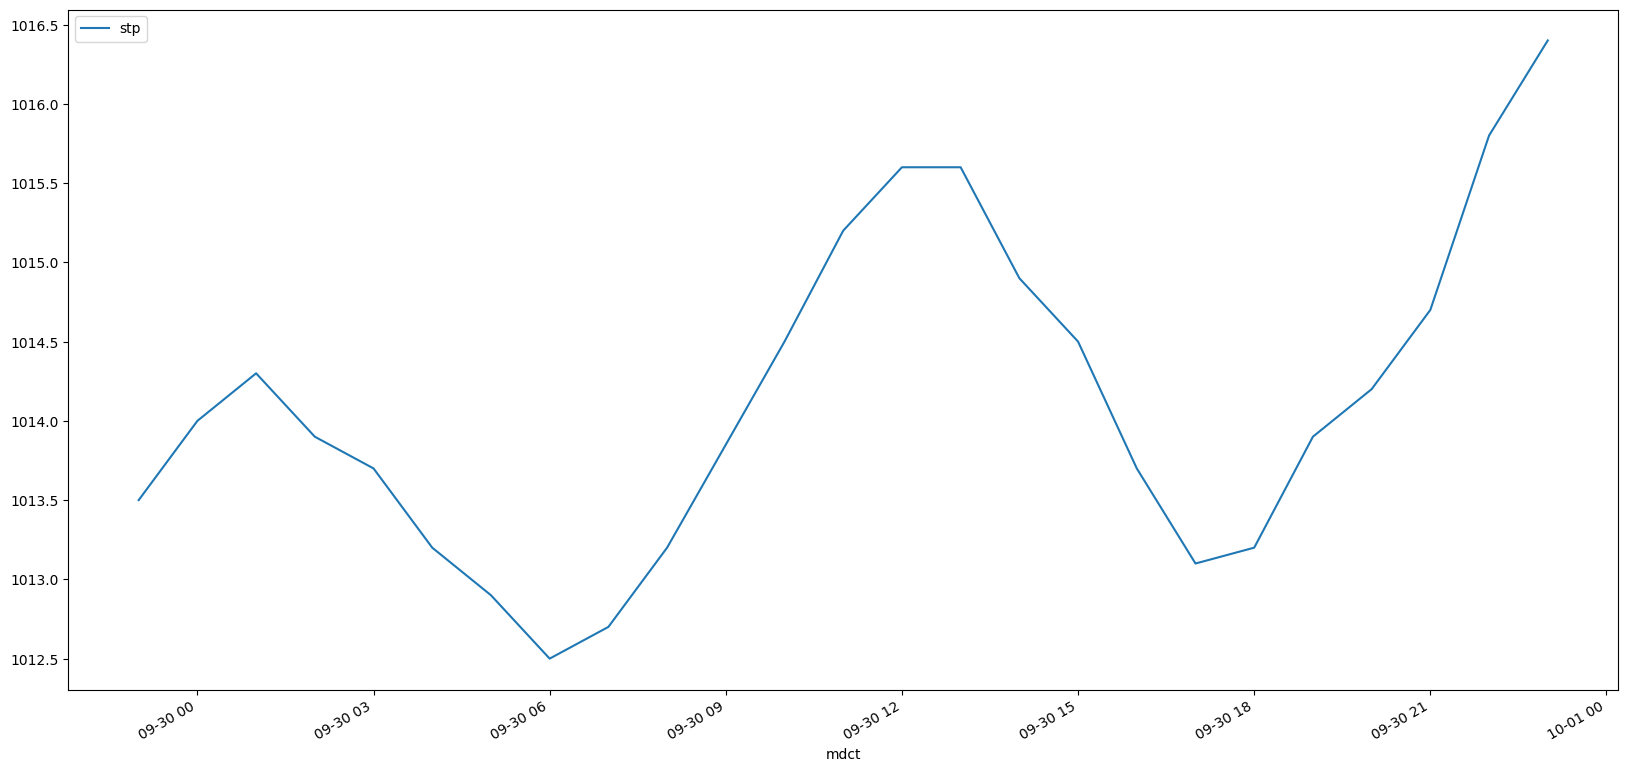

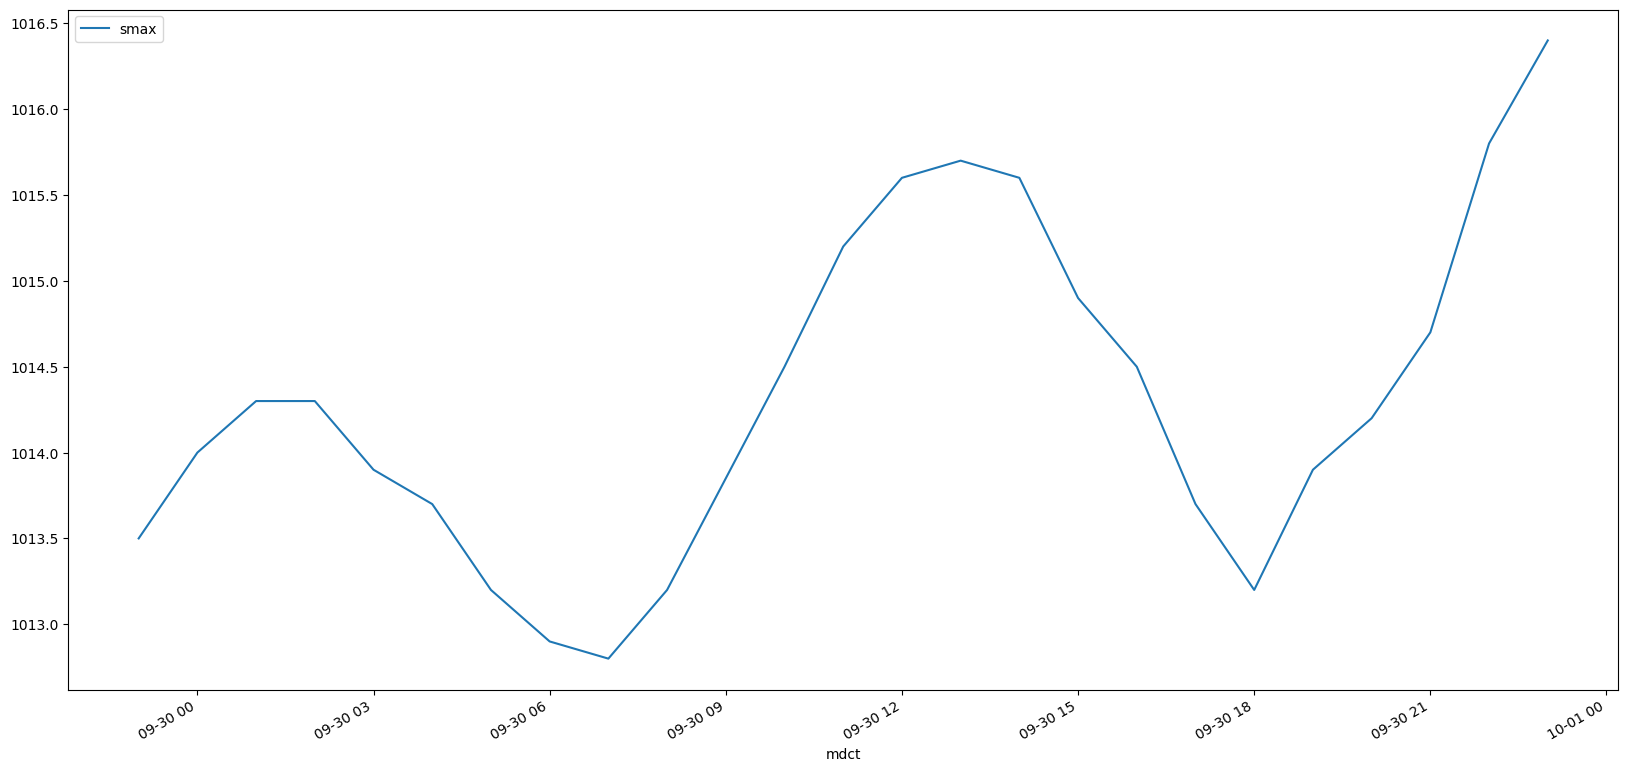

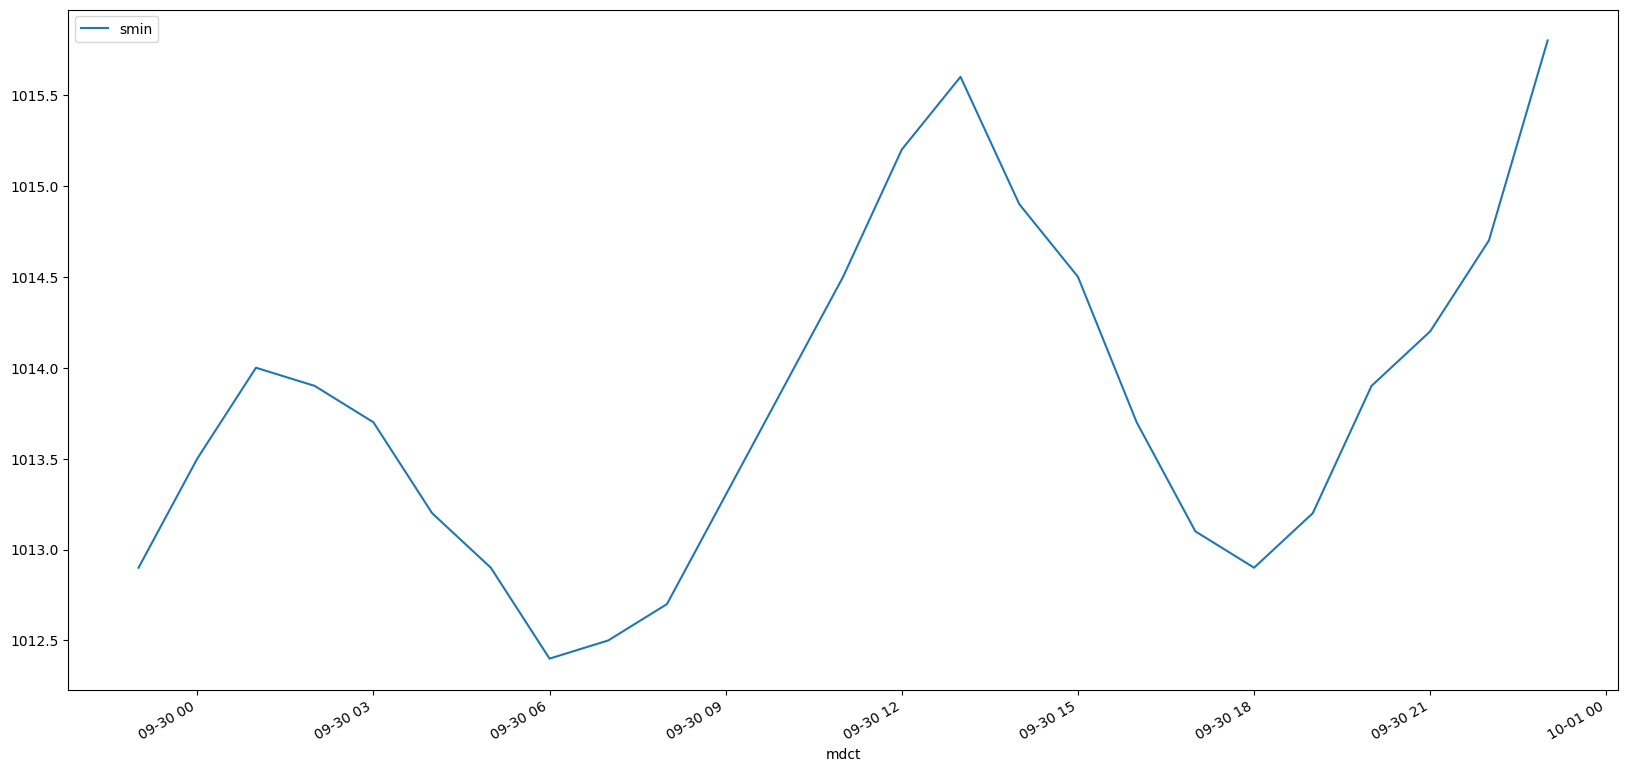

In [24]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(24)
station_384_tail_365 = station_384_tail_365.reset_index()

station_384_tail_365.plot(x='mdct', y='wdsp')
station_384_tail_365.plot(x='mdct', y='gust')
station_384_tail_365.plot(x='mdct', y='stp')
station_384_tail_365.plot(x='mdct', y='smax')
station_384_tail_365.plot(x='mdct', y='smin')


Folium Map of weather station location

In [25]:
a = df[['wsnm','lat','lon']].drop_duplicates()
for i in range(len(a)):
  print("folium.Marker([{},{}], popup='<b>{}</b>', tooltip=tooltip).add_to(m)".format(a.lat.values[i], a.lon.values[i], a.wsnm.values[i]))

folium.Marker([-6.835777,-38.311583], popup='<b>SÃO GONÇALO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.271094,-40.306069], popup='<b>VITÓRIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.988388,-40.579572], popup='<b>SANTA TERESA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.356923,-40.06868], popup='<b>LINHARES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.636526,-40.741818], popup='<b>ALFREDO CHAVES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.676198,-39.864051], popup='<b>SÃO MATEUS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.750412,-41.488852], popup='<b>ALEGRE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.100805,-41.039395], popup='<b>PRES. KENNEDY</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.695265,-40.390572], popup='<b>NOVA VENECIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.104194,-41.106861], popup='<b>AFONSO CLAUDIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.228373,-43.767703], popup='<b>BARBACENA</b>', 

In [27]:
m = folium.Map(
    location=[-19.481935, -45.593932],
    zoom_start = 4,
    tiles = 'Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([-6.835777,-38.311583], popup='<b>SÃO GONÇALO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.271094,-40.306069], popup='<b>VITÓRIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.988388,-40.579572], popup='<b>SANTA TERESA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.356923,-40.06868], popup='<b>LINHARES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.636526,-40.741818], popup='<b>ALFREDO CHAVES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.676198,-39.864051], popup='<b>SÃO MATEUS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.750412,-41.488852], popup='<b>ALEGRE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.100805,-41.039395], popup='<b>PRES. KENNEDY</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.695265,-40.390572], popup='<b>NOVA VENECIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.104194,-41.106861], popup='<b>AFONSO CLAUDIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.228373,-43.767703], popup='<b>BARBACENA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.605696,-46.949617], popup='<b>ARAXÁ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.686316,-43.843763], popup='<b>MONTES CLAROS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.917072,-48.255657], popup='<b>UBERLÂNDIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.166773,-40.687756], popup='<b>ALMENARA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.861604,-46.043365], popup='<b>MONTE VERDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.762607,-42.864013], popup='<b>VIÇOSA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.573824,-42.622413], popup='<b>TIMÓTEO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.952907,-49.525072], popup='<b>ITUIUTABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.556592,-43.75622], popup='<b>OURO BRANCO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.106502,-44.250928], popup='<b>S.J.DEL REI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.566513,-45.4043], popup='<b>VARGINHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.745237,-46.633916], popup='<b>PASSOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.104867,-42.375904], popup='<b>MURIAÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.769965,-43.364329], popup='<b>JUÍZ DE FORA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.53921,-49.518133], popup='<b>CAMPINA VERDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.98586,-48.151574], popup='<b>CONC. DAS ALAGOAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.883945,-43.969397], popup='<b>BELO HOR. (PAMPULHA)</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.798799,-40.249933], popup='<b>SERRA DOS AIMORES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.996684,-46.985935], popup='<b>PATROCÍNIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.45493,-45.453825], popup='<b>FORMIGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.875271,-47.434102], popup='<b>SACRAMENTO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-14.408228,-44.404123], popup='<b>MONTALVANIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.89284,-41.515423], popup='<b>TEÓFILO OTONI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.200855,-45.459836], popup='<b>TRÊS MARIAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.395799,-44.961909], popup='<b>PASSA QUATRO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.918066,-46.382996], popup='<b>CALDAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.314567,-45.373049], popup='<b>MARIA DA FÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.830354,-41.977007], popup='<b>GOVERNADOR VALADARES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.786842,-42.942921], popup='<b>GUANHÃES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.532768,-41.090801], popup='<b>AIMORES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.885398,-44.416883], popup='<b>FLORESTAL</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.481935,-45.593932], popup='<b>DORES DO INDAIÁ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.231052,-43.648269], popup='<b>DIAMANTINA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.747711,-44.453785], popup='<b>CURVELO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.085958,-44.016036], popup='<b>MOCAMBINHO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.78062,-40.986505], popup='<b>MANTENA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.705504,-42.389256], popup='<b>CAPELINHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.554101,-46.881935], popup='<b>UNAI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-14.912284,-42.808473], popup='<b>ESPINOSA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.524262,-46.435536], popup='<b>BURITIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.258064,-44.8356], popup='<b>PIRAPORA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.561349,-47.199251], popup='<b>GUARDA-MOR</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.362747,-45.123801], popup='<b>SÃO ROMÃO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.300159,-45.617431], popup='<b>CHAPADA GAÚCHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.751536,-41.457787], popup='<b>ÁGUAS VERMELHAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.575667,-41.485588], popup='<b>ITAOBIM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.723139,-42.43575], popup='<b>RIO PARDO DE MINAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.160327,-42.310266], popup='<b>SALINAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.78477,-46.119394], popup='<b>JOÃO PINHEIRO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.735757,-42.137146], popup='<b>CARATINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.031457,-44.011249], popup='<b>IBIRITÈ (ROLA MOÇA)</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.263378,-42.182817], popup='<b>MANHUAÇU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.546728,-43.261029], popup='<b>CORONEL PACHECO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.448089,-44.366313], popup='<b>JANUARIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.239555,-45.008187], popup='<b>POMPEU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.909892,-47.114259], popup='<b>SÃO SEBASTIAO DO PARAÍSO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.455288,-44.17338], popup='<b>SETE LAGOAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.980034,-43.958651], popup='<b>BELO HORIZONTE - CERCADINHO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.757868,-43.684843], popup='<b>ECOLOGIA AGRÍCOLA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.050334,-43.595685], popup='<b>MARAMBAIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.589806,-43.282233], popup='<b>XEREM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.587729,-41.958327], popup='<b>CAMBUCÍ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.975468,-42.02145], popup='<b>ARRAIAL DO CABO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.041647,-41.051871], popup='<b>CAMPOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.376318,-41.812053], popup='<b>MACAÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.450924,-44.444786], popup='<b>RESENDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.464889,-43.291505], popup='<b>PICO DO COUTO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.358094,-43.695656], popup='<b>VALENÇA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.448922,-42.987146], popup='<b>TERESÓPOLIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.22354,-44.726863], popup='<b>PARATÍ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.041647,-41.051871], popup='<b>SÃO TOMÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.861322,-43.41141], popup='<b>VILA MILITAR</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.334839,-42.676932], popup='<b>NOVA FRIBURGO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.098391,-43.208574], popup='<b>TRÊS RIOS </b>', tooltip=tooltip).add_to(m)
folium.Marker([-13.453981,-56.677323], popup='<b>RIO CLARO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.988286,-43.190436], popup='<b>FORTE DE COPACABANA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.645911,-42.415775], popup='<b>SILVA JARDIM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.871321,-42.609219], popup='<b>SAQUAREMA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.496294,-46.620088], popup='<b>SAO PAULO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.358052,-49.028877], popup='<b>BAURU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.750231,-45.603836], popup='<b>CAMPOS DO JORDÃO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.119867,-51.408637], popup='<b>PRESIDENTE PRUDENTE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.584475,-47.382549], popup='<b>FRANCA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.980353,-47.883927], popup='<b>SÃO CARLOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-24.671654,-47.545896], popup='<b>IGUAPE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.426035,-47.585552], popup='<b>SOROCABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.981918,-48.885818], popup='<b>ITAPEVA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.852022,-48.164817], popup='<b>S. MIG. ARCANJO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.949,-49.894546], popup='<b>OURINHOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.372832,-50.97471], popup='<b>RANCHARIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.101749,-48.940997], popup='<b>AVARÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.703132,-47.623317], popup='<b>PIRACICABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.666045,-49.734854], popup='<b>LINS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.041668,-45.520841], popup='<b>TAUBATÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.403221,-49.966031], popup='<b>VOTUPORANGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.165025,-50.595134], popup='<b>JALES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.319138,-50.930158], popup='<b>VALPARAISO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.085675,-49.920388], popup='<b>JOSÉ BONIFÁCIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.132937,-48.840426], popup='<b>ARIRANHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.855567,-48.799717], popup='<b>IBITINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.78056,-47.07528], popup='<b>CASA BRANCA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.415062,-46.805292], popup='<b>ITAPIRA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.228362,-45.417055], popup='<b>S LUIS DO PARAITINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.471205,-48.557573], popup='<b>BARRA BONITA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.993611,-46.256389], popup='<b>MOELA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-24.962819,-48.416379], popup='<b>BARRA DO TURVO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.338432,-48.114007], popup='<b>PRADÓPOLIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.559175,-48.544997], popup='<b>BARRETOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.35976,-47.77522], popup='<b>ITUVERAVA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.52389,-46.86945], popup='<b>BARUERI</b>', tooltip=tooltip).add_to(m)

m

In [29]:
df[df['wsnm']=='SÃO GONÇALO'].head(2)

wsid         wsnm   elvt       lat        lon  inme  \
mdct                                                                       
2007-11-06 00:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 01:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   

                            city prov        date    yr  mo  da  hr  prcp  \
mdct                                                                        
2007-11-06 00:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   0   0.0   
2007-11-06 01:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   1   0.0   

                       stp   smax   smin  gbrd  temp  dewp  tmax  dmax  tmin  \
mdct                                                                           
2007-11-06 00:00:00  982.5  982.5  981.3   0.0  29.3  12.1  29.7  16.8  25.5   
2007-11-06 01:00:00  983.2  983.2  982.5   0.0  29.0  13.5  29.9  13.6  29.0   

                     dmin  hmdy  hmax  hmin  wdsp   wdct  gust  
mdct                                                            
2007-11-06 00:00:00  10.8  35.0  58.0  32.0   3.2  101.0   6.5  
2007-11-06 01:00:00  12.2  39.0  39.0  35.0   3.6   94.0   6.4

In [30]:
df[df['wsnm']=='RIO CLARO'].head(2)

wsid       wsnm   elvt        lat        lon  inme  \
mdct                                                                      
2016-06-06 22:00:00   387  RIO CLARO  340.0 -13.453981 -56.677323  A903   
2016-06-06 23:00:00   387  RIO CLARO  340.0 -13.453981 -56.677323  A903   

                          city prov        date    yr  mo  da  hr  prcp  \
mdct                                                                      
2016-06-06 22:00:00  Rio Claro   RJ  2016-06-06  2016   6   6  22   0.0   
2016-06-06 23:00:00  Rio Claro   RJ  2016-06-06  2016   6   6  23   0.0   

                       stp   smax   smin  gbrd  temp  dewp  tmax  dmax  tmin  \
mdct                                                                           
2016-06-06 22:00:00  951.7  951.7  951.2   0.0  22.7  21.8  23.4  22.0  22.7   
2016-06-06 23:00:00  953.1  953.2  951.7   0.0  21.3  20.5  22.8  21.8  21.3   

                     dmin  hmdy  hmax  hmin  wdsp   wdct  gust  
mdct                                                            
2016-06-06 22:00:00  21.6  95.0  95.0  91.0   1.8   89.0   4.6  
2016-06-06 23:00:00  20.5  95.0  96.0  93.0   2.1  153.0   5.6

In [31]:
df[df['wsnm']=='RIO CLARO'].head(2)

wsid       wsnm   elvt        lat        lon  inme  \
mdct                                                                      
2016-06-06 22:00:00   387  RIO CLARO  340.0 -13.453981 -56.677323  A903   
2016-06-06 23:00:00   387  RIO CLARO  340.0 -13.453981 -56.677323  A903   

                          city prov        date    yr  mo  da  hr  prcp  \
mdct                                                                      
2016-06-06 22:00:00  Rio Claro   RJ  2016-06-06  2016   6   6  22   0.0   
2016-06-06 23:00:00  Rio Claro   RJ  2016-06-06  2016   6   6  23   0.0   

                       stp   smax   smin  gbrd  temp  dewp  tmax  dmax  tmin  \
mdct                                                                           
2016-06-06 22:00:00  951.7  951.7  951.2   0.0  22.7  21.8  23.4  22.0  22.7   
2016-06-06 23:00:00  953.1  953.2  951.7   0.0  21.3  20.5  22.8  21.8  21.3   

                     dmin  hmdy  hmax  hmin  wdsp   wdct  gust  
mdct                                                            
2016-06-06 22:00:00  21.6  95.0  95.0  91.0   1.8   89.0   4.6  
2016-06-06 23:00:00  20.5  95.0  96.0  93.0   2.1  153.0   5.6

In [32]:
df.loc[df['wsnm']=='RIO CLARO','lat'] = -22.722778
df.loc[df['wsnm']=='RIO CLARO','lon'] = -44.135833
df.loc[df['wsnm']=='SÃO GONÇALO','lat'] = -22.826944
df.loc[df['wsnm']=='SÃO GONÇALO','lon'] = -43.053889

In [33]:
df.to_hdf('cleaned_df.hdf','mydata',mode='w')

In [ ]:
df = pd.read_hdf('cleaned_df.hdf','mydata')

<Axes: xlabel='mdct'>

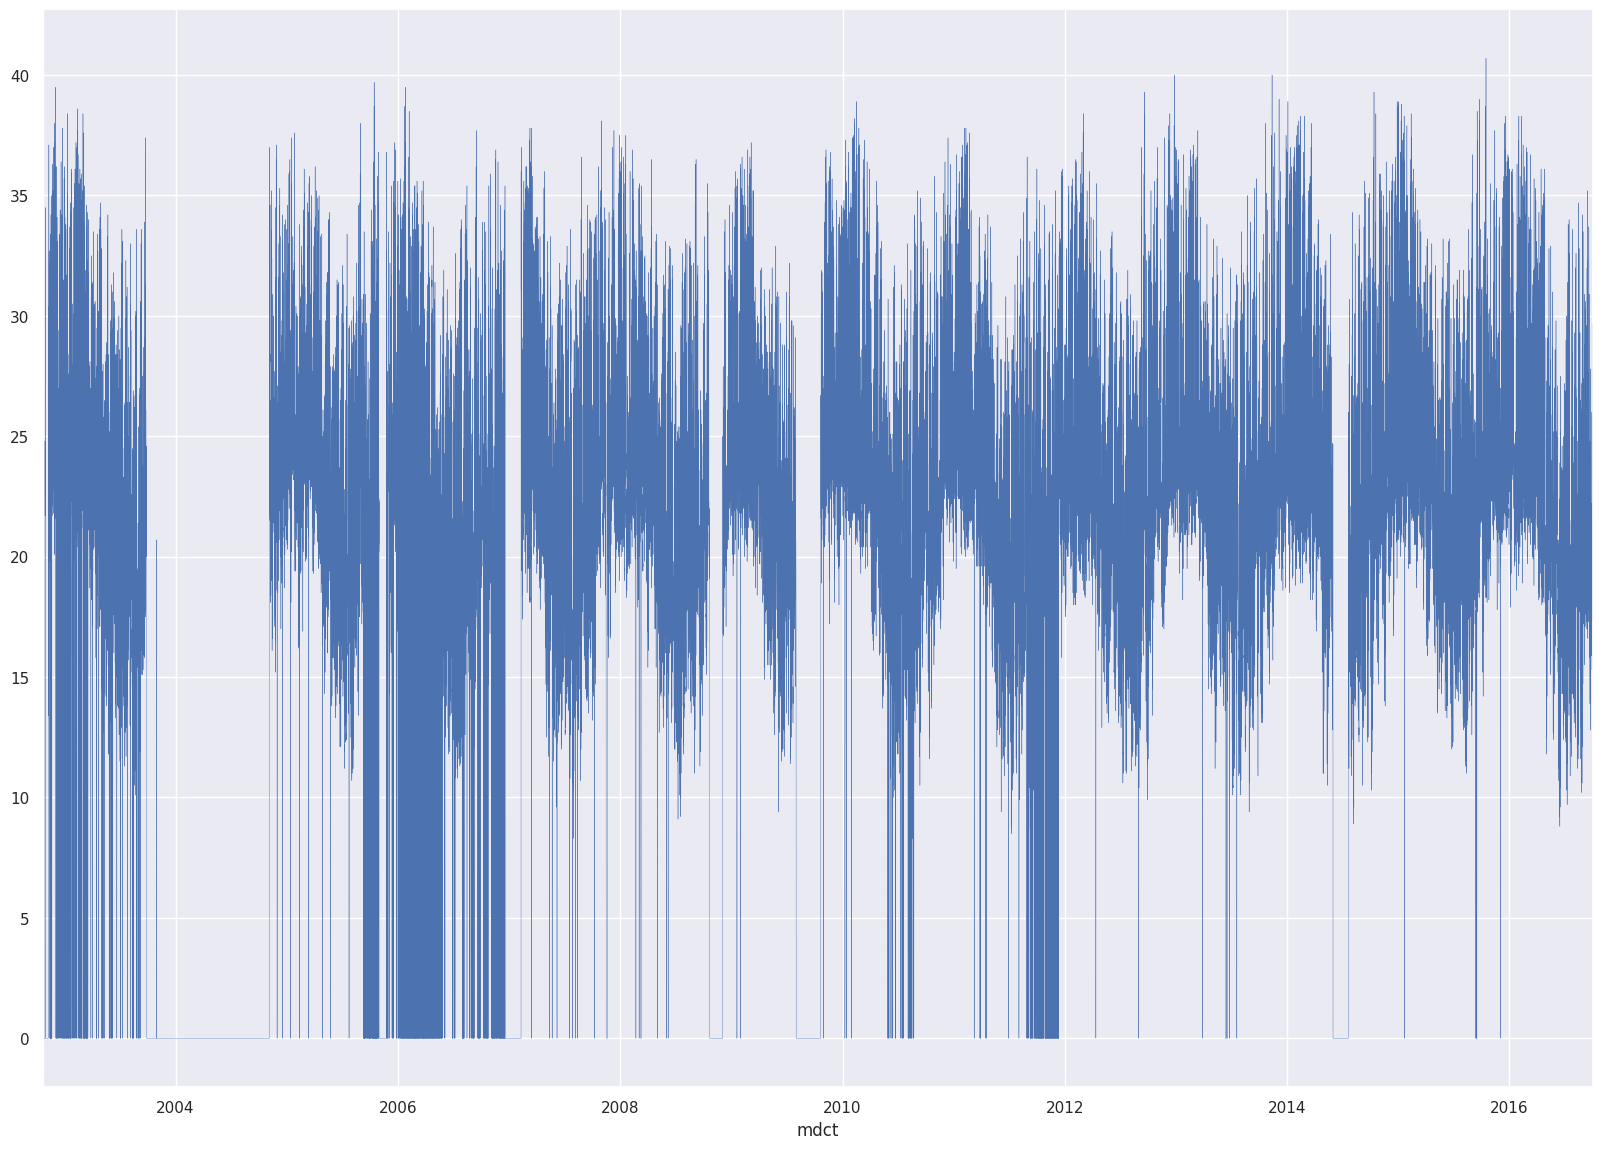

In [15]:
sns.set(rc={'figure.figsize' : (20,14)})
is_373 = df['wsid'] == 373
station_373 = df[is_373]
station_373['temp'].plot(linewidth=0.3)

<Axes: xlabel='mdct'>

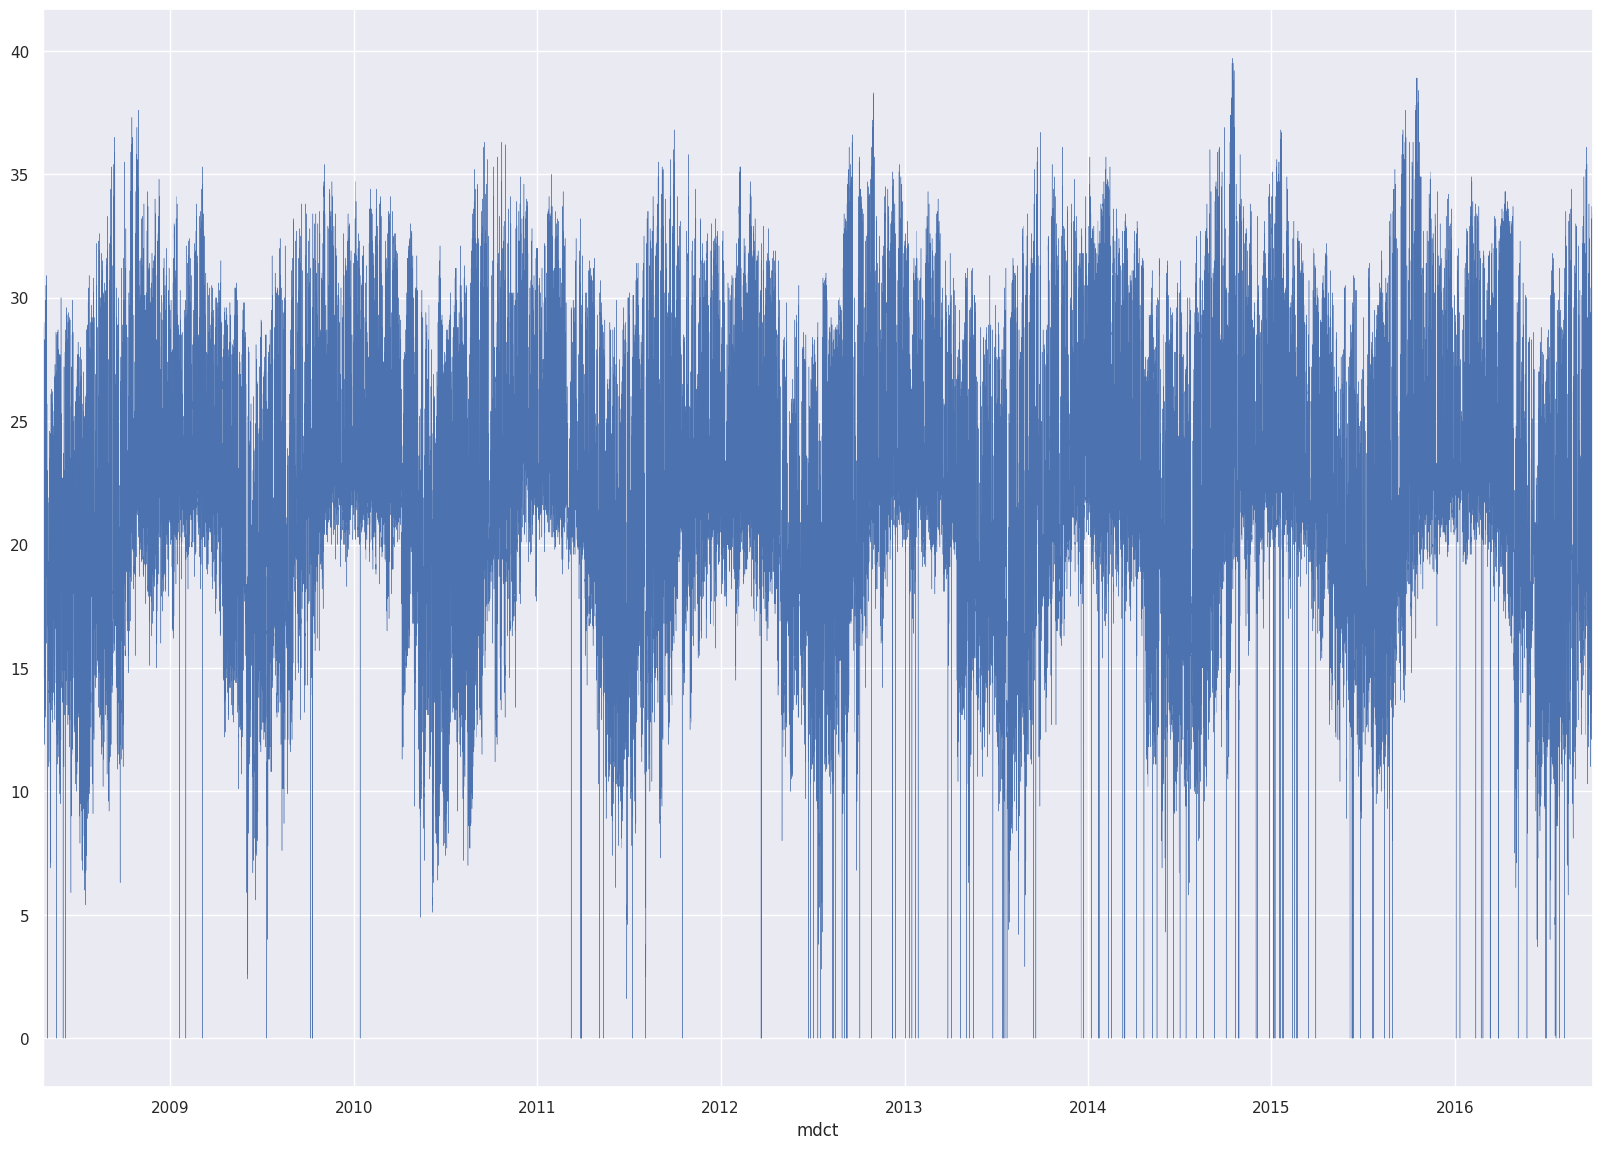

In [16]:
sns.set(rc={'figure.figsize' : (20,14)})
is_420 = df['wsid'] == 420
station_420 = df[is_420]

station_420['temp'].plot(linewidth=0.3)

<Axes: xlabel='da'>

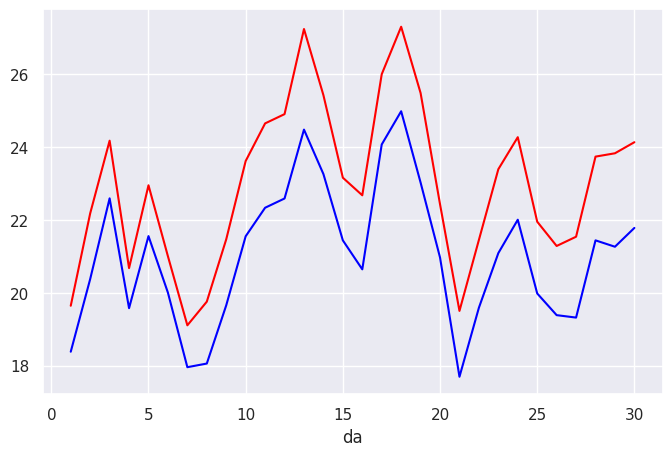

In [20]:
is_420 = df['wsid'] == 420
station_420 = df[is_420]
station_420_month = station_420.tail(720)
station_420_month_tmax = station_420_month['tmax'].groupby(station_420_month['da'])
station_420_month_tmin = station_420_month['tmin'].groupby(station_420_month['da'])
tmax_mean = station_420_month_tmax.mean()
tmin_mean = station_420_month_tmin.mean()
plt.figure()
tmax_mean.plot(color='red', figsize=[8,5])
tmin_mean.plot(color='blue')

In [27]:
index = []
year = []
city = []
tmax = []

for i in df.yr.unique():
    k = df.loc[df['yr'] == int(i)].tmax.nlargest()
    for w in range(5):
        try:
            g = df.loc[k.index[w]][df.loc[k.index[w]].tmax == k[w]]
            city.append(g.iloc[0]['city'])
            year.append(i)
            index.append(k.index[w])
            tmax.append(k[w])
        except:
            pass
        
df1 = pd.DataFrame({'date': index,'city': city,'tmax': tmax, 'year':year})
df1

KeyboardInterrupt: ignored

In [ ]:
index = []
city = []
tmin = []
year = []

for i in df.yr.unique():
    k = df.loc[df['yr'] == int(i)].tmin.nsmallest()
    for w in range(5):
        try:
            g = df.loc[k.index[w]][df.loc[k.index[w]].tmin == k[w]]
            city.append(g.iloc[0]['city'])
            year.append(i)
            index.append(k.index[w])
            tmin.append(k[w])
        except:
            pass
        
df2 = pd.DataFrame({'date': index,'city': city,'tmin': tmin,'year':year})
df2

In [28]:
group_df = df['prcp'].groupby(df['prov'])
group_df.sum()

prov
ES    102779.4
MG    613471.8
RJ    228718.0
SP    373825.2
Name: prcp, dtype: float64

In [29]:
group_df_wsid = df['prcp'].groupby(df['wsid'])
group_df_wsid.sum()

wsid
178     6159.6
303    14505.2
304    15284.6
305    11789.0
306    15185.8
307    11128.4
308    13291.6
309     9593.8
310     7554.4
311     4446.6
312    20703.6
313    20385.2
314    10570.0
315    16934.8
316    10133.8
317    17881.8
318    13916.4
319    14066.4
320    13158.6
321    13956.2
322    14391.8
323    13098.8
324    11679.6
325    15755.0
326    14157.8
327    13260.8
328    12681.8
329    17453.0
330     9738.0
331    12830.8
332    12654.6
333    15404.2
334     5625.8
335    10437.6
336    11497.6
337     9587.2
338    14038.6
339    15631.0
340     7891.8
341    10843.4
342     7609.2
343    12661.0
344    11211.4
345    11845.4
346    10299.2
347     6336.8
348     9187.8
349     9802.8
350    10414.4
351     4970.8
352     8867.4
353     8701.0
354     8032.8
355     7749.2
356     8732.0
357     6148.6
358     5606.6
359     6634.4
360     6907.0
361    10954.8
362    10751.2
363    12901.6
364     5729.2
365     5218.4
366        2.2
367      976.0
368  

In [30]:
group_df_wsid.max()

wsid
178     68.6
303     70.2
304     43.8
305     51.8
306     69.4
307     71.2
308     78.4
309     96.8
310     55.0
311     42.8
312     65.0
313     54.4
314     53.6
315     54.8
316     60.8
317     49.8
318     63.0
319     76.2
320     56.4
321     66.2
322     74.8
323     50.2
324     56.2
325     69.0
326     50.0
327     65.0
328     46.0
329     78.4
330     85.4
331     48.6
332     70.6
333     62.0
334     55.2
335     54.2
336     57.8
337     43.6
338     57.2
339     47.8
340     45.8
341     64.0
342     46.2
343     69.8
344     62.0
345     42.8
346     70.4
347     49.4
348     52.0
349     47.6
350     53.6
351     55.6
352     63.0
353     43.6
354     55.0
355    100.0
356     52.2
357     45.8
358     51.8
359     51.4
360     70.2
361     70.4
362     72.4
363     51.0
364     47.8
365     43.4
366      1.4
367     25.2
368     55.0
369     15.0
370     50.0
371     66.2
372     79.8
373     89.0
374     63.6
375     68.8
376     62.8
377     65.2
378    

In [31]:
import seaborn
seaborn.set_style('ticks')
%matplotlib inline

In [32]:
is_379 = df['wsid'] == 379
wsid_379 = df[is_379]

In [33]:
total_count = wsid_379.shape[0]
calm_count = wsid_379.query("wdsp == 0").shape[0]

print('Of {} total observations, {} have calm winds.'.format(total_count, calm_count))

Of 87168 total observations, 17425 have calm winds.


In [34]:
def speed_labels(bins, units):   
    labels = []
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('calm'.format(right))
        elif np.isinf(right):
            labels.append('>{} {}'.format(left, units))
        else:
            labels.append('{} - {} {}'.format(left, right, units))

    return list(labels)

def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * np.pi/180. - np.pi/N
    barWidth = 2 * np.pi / N

In [36]:
spd_bins = [-1, 0, 3, 6, 9, 12, 15, 18, np.inf]
spd_labels = speed_labels(spd_bins, units='m/s')

dir_bins = np.arange(-7.5, 370, 15)
#print(dir_bins)
dir_labels = (dir_bins[:-1] + dir_bins[1:]) / 2

In [37]:
rose1 = (
    wsid_379.assign(WindSpd_bins=lambda df:
            pd.cut(df['wdsp'], bins=spd_bins, labels=spd_labels, right=True)
         )
        .assign(WindDir_bins=lambda df:
            pd.cut(df['wdct'], bins=dir_bins, labels=dir_labels, right=False)
         )
        .replace({'WindDir_bins': {360: 0}})
        .groupby(by=['WindSpd_bins', 'WindDir_bins'])
        .size()
        .unstack(level='WindSpd_bins')
        .fillna(0)
        .assign(calm=lambda df: calm_count / df.shape[0])
        .sort_index(axis=1)
        .applymap(lambda x: x / total_count * 100)
)

In [38]:
def wind_rose(rosedata, wind_dirs, palette=None):
    if palette is None:
        palette = seaborn.color_palette('bright', n_colors=rosedata.shape[1])

    bar_dir, bar_width = _convert_dir(wind_dirs)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')
    for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
        if n == 0:
            # first column only
            ax.bar(bar_dir, rosedata[c1].values, 
                   width=bar_width,
                   color=palette[0],
                   edgecolor='none',
                   label=c1,
                   linewidth=0)

        # all other columns
        ax.bar(bar_dir, rosedata[c2].values, 
               width=bar_width, 
               bottom=rosedata.cumsum(axis=1)[c1].values,
               align='edge',
               color=palette[n+1],
               edgecolor='none',
               label=c2,
               linewidth=0)

    leg = ax.legend(loc=(0.75, 0.95), ncol=2)
    xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    
    return fig

In [39]:
directions = np.arange(0, 360, 15)
fig = wind_rose(rose1, directions)

TypeError: ignored

In [40]:
is_375 = df['wsid'] == 375
wsid_375 = df[is_375]

rose2 = (
    wsid_375.assign(WindSpd_bins=lambda df:
            pd.cut(df['wdsp'], bins=spd_bins, labels=spd_labels, right=True)
         )
        .assign(WindDir_bins=lambda df:
            pd.cut(df['wdct'], bins=dir_bins, labels=dir_labels, right=False)
         )
        .replace({'WindDir_bins': {360: 0}})
        .groupby(by=['WindSpd_bins', 'WindDir_bins'])
        .size()
        .unstack(level='WindSpd_bins')
        .fillna(0)
        .assign(calm=lambda df: calm_count / df.shape[0])
        .sort_index(axis=1)
        .applymap(lambda x: x / total_count * 100)
)

In [41]:
fig = wind_rose(rose2, directions)

TypeError: ignored